In [120]:
pip install sweetvi

Note: you may need to restart the kernel to use updated packages.Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for sweetviz from https://files.pythonhosted.org/packages/89/50/8d3f7ca820267a38b42c64778db0f186d85cec6e3f0c5210eab9c16e783f/sweetviz-2.3.1-py3-none-any.whl.metadata
  Obtaining dependency information for importlib-resources>=1.2.0 from https://files.pythonhosted.org/packages/93/e8/facde510585869b5ec694e8e0363ffe4eba067cb357a8398a55f6a1f8023/importlib_resources-6.1.1-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/15.1 MB ? eta -:--:--
   - -------------------------------------- 0.5/15.1 MB 13.8 MB/s eta 0:00:02
   - -------------------------------------- 0.7/15.1 MB 6.4 MB/s eta 0:00:03
   -- ------------------------------------- 1.1/15.1 MB 6.9 MB/s eta 0:00:03
   --- ------------------------------------ 1.4/15.1 MB 6.9 MB/s eta 0:00:02
   ---- ----------------------------------- 1.6

In [121]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Preparation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import IncrementalPCA
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

# Model Building
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
import sweetviz as sv


# Model Evaluation
from sklearn import metrics
from sklearn.metrics import confusion_matrix


import warnings
warnings.filterwarnings('ignore')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline

pd.set_option("display.max_columns", 300)
pd.set_option("display.max_rows", 300)

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
data_dict = pd.read_csv('data_dictionary.csv')
print("train shape",train.shape)
print("test shape",test.shape)

train shape (69999, 172)
test shape (30000, 171)


In [3]:
train.head()

id  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0   0        109             0.0             0.0             0.0   
1   1        109             0.0             0.0             0.0   
2   2        109             0.0             0.0             0.0   
3   3        109             0.0             0.0             0.0   
4   4        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8   arpu_6  \
0            6/30/2014            7/31/2014            8/31/2014   31.277   
1            6/30/2014            7/31/2014            8/31/2014    0.000   
2            6/30/2014            7/31/2014            8/31/2014   60.806   
3            6/30/2014            7/31/2014            8/31/2014  156.362   
4            6/30/2014            7/31/2014            8/31/2014  240.708   

    arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  \
0   87.009    7.527        48.58       124.38         1.29         32.24   
1  122.787   42.953         0.00         0.00         0.00          0.00   
2  103.176    0.000         0.53        15.93         0.00         53.99   
3  205.260  111.095         7.26        16.01         0.00         68.76   
4  128.191  101.565        21.28         4.83         6.13         56.99   

   offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0         96.68          2.33           0.00            0.0            0.0   
1         25.99         30.89           0.00            0.0            0.0   
2         82.05          0.00           0.00            0.0            0.0   
3         78.48         50.23           0.00            0.0            0.0   
4         38.11          9.63          53.64            0.0            0.0   

   roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  \
0           0.00            0.0           0.00              2.23   
1           0.00            0.0           0.00              0.00   
2           0.00            0.0           0.00              0.53   
3           0.00            0.0           1.63              6.99   
4          15.73            0.0           0.00             10.16   

   loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
0              0.00              0.28              5.29             16.04   
1              0.00              0.00              0.00              0.00   
2             12.98              0.00             24.11              0.00   
3              3.94              0.00             37.91             44.89   
4              4.83              6.13             36.74             19.88   

   loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  \
0              2.33              0.00              0.00              0.00   
1              0.00              0.00              0.00              0.00   
2              0.00              0.00              0.00              0.00   
3             23.63              0.00              0.00              0.00   
4              4.61             11.99              1.23              5.01   

   loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  \
0              0.00              0.00              0.00          7.53   
1              0.00             22.01             29.79          0.00   
2              2.14              0.00              0.00         24.64   
3              0.00              0.00              8.03         44.91   
4              0.00              9.85              0.00         58.91   

   loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  \
0         16.04          2.61             46.34            124.38   
1          0.00          0.00              0.00              0.00   
2         12.98          0.00              0.00              2.94   
3         48.84         23.63              0.26             12.06   
4         25.94         15.76              0.00              0.00   

   std_og_t2t_mo

In [4]:
test.head()

id  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0  69999        109             0.0             0.0             0.0   
1  70000        109             0.0             0.0             0.0   
2  70001        109             0.0             0.0             0.0   
3  70002        109             0.0             0.0             0.0   
4  70003        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8   arpu_6  \
0            6/30/2014            7/31/2014            8/31/2014   91.882   
1            6/30/2014            7/31/2014            8/31/2014  414.168   
2            6/30/2014            7/31/2014            8/31/2014  329.844   
3            6/30/2014            7/31/2014            8/31/2014   43.550   
4            6/30/2014            7/31/2014            8/31/2014  306.854   

    arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  \
0   65.330   64.445        31.78        20.23        23.11         60.16   
1  515.568  360.868        75.51        41.21        19.84        474.34   
2  434.884  746.239         7.54         7.86         8.40         16.98   
3  171.390   24.400         5.31         2.16         0.00         40.04   
4  406.289  413.329       450.93       609.03       700.68         60.94   

   offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0         32.16         34.83           0.00           0.00           0.00   
1        621.84        394.94           0.00           0.00           0.00   
2         45.81         45.04          22.81         103.38          26.08   
3        205.01         24.01           0.00           0.00           0.00   
4         23.84         74.16           0.00           0.00           0.00   

   roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  \
0           0.00           0.00           0.00             24.88   
1           0.00           0.00           0.00             75.51   
2          24.53          53.68          54.44              0.00   
3           0.00           0.00           0.00              5.31   
4           0.00           0.00           0.00              0.45   

   loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
0             20.23             21.06             18.13             10.89   
1             41.21             19.84            473.61            598.08   
2              0.00              0.00              0.00              0.00   
3              0.00              0.00              2.94             98.61   
4              0.78             14.56              2.39              2.66   

   loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  \
0              8.36              0.00             13.58              0.00   
1            377.26              0.73              0.00              0.00   
2              0.00              0.00              0.00              0.00   
3             20.51              0.00              0.00              2.35   
4             10.94              0.00              0.00              0.00   

   loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  \
0               0.0              0.00              0.03         43.01   
1               0.0              0.00              0.00        549.86   
2               0.0              0.00              0.00          0.00   
3               0.0              6.18              0.00          8.26   
4               0.0              0.00              0.00          2.84   

   loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  \
0         44.71         29.43              6.90              0.00   
1        639.29        397.11              0.00              0.00   
2          0.00          0.00              0.00              0.00   
3         98.61         22.86              0.00              2.16   
4          3.44         25.51            450.48            608.24   

 

In [5]:
data_dict

Acronyms                                        Description
0     CIRCLE_ID  Telecom circle area to which the customer belo...
1           LOC            Local calls  within same telecom circle
2           STD              STD calls  outside the calling circle
3            IC                                     Incoming calls
4            OG                                     Outgoing calls
5           T2T  Operator T to T ie within same operator mobile...
6       T2M                    Operator T to other operator mobile
7       T2O                Operator T to other operator fixed line
8       T2F                         Operator T to fixed lines of T
9       T2C                      Operator T to its own call center
10     ARPU                               Average revenue per user
11      MOU                          Minutes of usage  voice calls
12      AON      Age on network  number of days the customer is...
13     ONNET     All kind of calls within the same operator net...
14   OFFNET       All kind of calls outside the operator T network
15         ROAM  Indicates that customer is in roaming zone dur...
16       SPL                                         Special calls
17      ISD                                              ISD calls
18     RECH                                               Recharge
19      NUM                                                 Number
20      AMT                               Amount in local currency
21      MAX                                                Maximum
22     DATA                                        Mobile internet
23       3G                                              G network
24       AV                                                Average
25      VOL                     Mobile internet usage volume in MB
26       2G                                              G network
27      PCK                  Prepaid service schemes called  PACKS
28    NIGHT         Scheme to use during specific night hours only
29  MONTHLY      Service schemes with validity equivalent to a ...
30    SACHET     Service schemes with validity smaller than a m...
31      *.6                              KPI for the month of June
32      *.7                              KPI for the month of July
33      *.8                            KPI for the month of August
34      FB_USER  Service scheme to avail services of Facebook a...
35      VBC      Volume based cost  when no specific scheme is ...

Combining all data files into one consolidated dataframe¶

In [6]:
telecom = pd.concat([train, test])

In [7]:
telecom = telecom.set_index('id')

In [8]:
telecom.head()

circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
id                                                              
0         109             0.0             0.0             0.0   
1         109             0.0             0.0             0.0   
2         109             0.0             0.0             0.0   
3         109             0.0             0.0             0.0   
4         109             0.0             0.0             0.0   

   last_date_of_month_6 last_date_of_month_7 last_date_of_month_8   arpu_6  \
id                                                                           
0             6/30/2014            7/31/2014            8/31/2014   31.277   
1             6/30/2014            7/31/2014            8/31/2014    0.000   
2             6/30/2014            7/31/2014            8/31/2014   60.806   
3             6/30/2014            7/31/2014            8/31/2014  156.362   
4             6/30/2014            7/31/2014            8/31/2014  240.708   

     arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  \
id                                                                          
0    87.009    7.527        48.58       124.38         1.29         32.24   
1   122.787   42.953         0.00         0.00         0.00          0.00   
2   103.176    0.000         0.53        15.93         0.00         53.99   
3   205.260  111.095         7.26        16.01         0.00         68.76   
4   128.191  101.565        21.28         4.83         6.13         56.99   

    offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
id                                                                            
0          96.68          2.33           0.00            0.0            0.0   
1          25.99         30.89           0.00            0.0            0.0   
2          82.05          0.00           0.00            0.0            0.0   
3          78.48         50.23           0.00            0.0            0.0   
4          38.11          9.63          53.64            0.0            0.0   

    roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  \
id                                                                  
0            0.00            0.0           0.00              2.23   
1            0.00            0.0           0.00              0.00   
2            0.00            0.0           0.00              0.53   
3            0.00            0.0           1.63              6.99   
4           15.73            0.0           0.00             10.16   

    loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
id                                                                           
0               0.00              0.28              5.29             16.04   
1               0.00              0.00              0.00              0.00   
2              12.98              0.00             24.11              0.00   
3               3.94              0.00             37.91             44.89   
4               4.83              6.13             36.74             19.88   

    loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  \
id                                                                           
0               2.33              0.00              0.00              0.00   
1               0.00              0.00              0.00              0.00   
2               0.00              0.00              0.00              0.00   
3              23.63              0.00              0.00              0.00   
4               4.61             11.99              1.23              5.01   

    loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  \
id                                                                       
0               0.00              0.00              0.00          7.53   
1               0.00             22.01             29.79          0.00   
2               2.14             

In [9]:
telecom.shape

(99999, 171)

In [10]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99999 entries, 0 to 99998
Columns: 171 entries, circle_id to churn_probability
dtypes: float64(136), int64(26), object(9)
memory usage: 131.2+ MB


In [11]:
# look at data statistics
telecom.describe(include='all')

circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
count     99999.0         98981.0         98981.0         98981.0   
unique        NaN             NaN             NaN             NaN   
top           NaN             NaN             NaN             NaN   
freq          NaN             NaN             NaN             NaN   
mean        109.0             0.0             0.0             0.0   
std           0.0             0.0             0.0             0.0   
min         109.0             0.0             0.0             0.0   
25%         109.0             0.0             0.0             0.0   
50%         109.0             0.0             0.0             0.0   
75%         109.0             0.0             0.0             0.0   
max         109.0             0.0             0.0             0.0   

       last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
count                 99999                99398                98899   
unique                    1                    1                    1   
top               6/30/2014            7/31/2014            8/31/2014   
freq                  99999                99398                98899   
mean                    NaN                  NaN                  NaN   
std                     NaN                  NaN                  NaN   
min                     NaN                  NaN                  NaN   
25%                     NaN                  NaN                  NaN   
50%                     NaN                  NaN                  NaN   
75%                     NaN                  NaN                  NaN   
max                     NaN                  NaN                  NaN   

              arpu_6        arpu_7        arpu_8   onnet_mou_6   onnet_mou_7  \
count   99999.000000  99999.000000  99999.000000  96062.000000  96140.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean      282.987358    278.536648    279.154731    132.395875    133.670805   
std       328.439770    338.156291    344.474791    297.207406    308.794148   
min     -2258.709000  -2014.045000   -945.808000      0.000000      0.000000   
25%        93.411500     86.980500     84.126000      7.380000      6.660000   
50%       197.704000    191.640000    192.080000     34.310000     32.330000   
75%       371.060000    365.344500    369.370500    118.740000    115.595000   
max     27731.088000  35145.834000  33543.624000   7376.710000   8157.780000   

         onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
count   94621.000000  96062.000000  96140.000000  94621.000000   96062.000000   
unique           NaN           NaN           NaN           NaN            NaN   
top              NaN           NaN           NaN           NaN            NaN   
freq             NaN           NaN           NaN           NaN            NaN   
mean      133.018098    197.935577    197.045133    196.574803       9.950013   
std       308.951589    316.851613    325.862803    327.170662      72.825411   
min         0.000000      0.000000      0.000000      0.000000       0.000000   
25%         6.460000     34.730000     32.190000     31.630000       0.000000   
50%        32.360000     96.310000     91.735000     92.140000       0.000000   
75%       115.860000    231.860000    226.815000    228.260000       0.000000   
max     10752.560000   8362.360000   9667.130000  14007.340000   13724.380000   

        roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  \
count    96140.000000   94621.000000   96062.000000   96140.000000   
unique            NaN            NaN            NaN            NaN   
top               NaN            NaN            NaN            NaN   
freq              NaN            NaN            NaN            NaN   
mean         7.149

As we decribe the data here some columns have missing values so we need check the realtionship we those column with churn_probability and if not then drop it.

Let's divided into two part Numerical and Categorical

In [122]:
# Before following step we checl auto EDA with sweetviz
report = sv.analyze(telecom)

# Save the report to an HTML file
report.show_html('eda_report.html')

                                             |                                             | [  0%]   00:00 ->…

Report eda_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


### Filtering the High Value of Customers

In [12]:
# Check for missing values in av_rech_amt_data_6,av_rech_amt_data_7, and av_rech_amt_data_8.

print(telecom.av_rech_amt_data_6.isnull().sum()/telecom.shape[0])
print(telecom.av_rech_amt_data_7.isnull().sum()/telecom.shape[0])
print(telecom.av_rech_amt_data_8.isnull().sum()/telecom.shape[0])


0.7484674846748467
0.7442874428744287
0.7366073660736607


In [13]:
telecom[['av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8']].describe()

av_rech_amt_data_6  av_rech_amt_data_7  av_rech_amt_data_8
count        25153.000000        25571.000000        26339.000000
mean           192.600982          200.981292          197.526489
std            192.646318          196.791224          191.301305
min              1.000000            0.500000            0.500000
25%             82.000000           92.000000           87.000000
50%            154.000000          154.000000          154.000000
75%            252.000000          252.000000          252.000000
max           7546.000000         4365.000000         4076.000000

In [14]:
telecom.av_rech_amt_data_6 = telecom.av_rech_amt_data_6.fillna(0)
telecom.av_rech_amt_data_7 = telecom.av_rech_amt_data_7.fillna(0)
telecom.av_rech_amt_data_8 = telecom.av_rech_amt_data_8.fillna(0)

telecom['av_rech_amt_data_3Mont_total'] = (telecom.av_rech_amt_data_6+telecom.av_rech_amt_data_7+telecom.av_rech_amt_data_8)

print(telecom[telecom.av_rech_amt_data_3Mont_total > telecom.av_rech_amt_data_3Mont_total.quantile(0.70)].shape)
print(telecom[telecom.av_rech_amt_data_3Mont_total == telecom.av_rech_amt_data_3Mont_total.quantile(0.70)].shape)

High_value_customers = telecom[telecom.av_rech_amt_data_3Mont_total >= telecom.av_rech_amt_data_3Mont_total.quantile(0.70)]
High_value_customers.drop('av_rech_amt_data_3Mont_total',axis=1, inplace=True)
print(High_value_customers.shape)

(29938, 172)
(234, 172)
(30172, 171)


### Handling Missing Value

In [15]:
# Identifying the highly skewed features, features having fixed value in all row.

skewed = []
for x in High_value_customers.columns:
    if len(High_value_customers[x].value_counts())==1:
        skewed.append(x)
        print(High_value_customers[x].value_counts())
print('Removing feature: ' ,skewed)

circle_id
109    30172
Name: count, dtype: int64
loc_og_t2o_mou
0.0    29726
Name: count, dtype: int64
std_og_t2o_mou
0.0    29726
Name: count, dtype: int64
loc_ic_t2o_mou
0.0    29726
Name: count, dtype: int64
last_date_of_month_6
6/30/2014    30172
Name: count, dtype: int64
last_date_of_month_7
7/31/2014    30136
Name: count, dtype: int64
last_date_of_month_8
8/31/2014    29989
Name: count, dtype: int64
std_og_t2c_mou_6
0.0    28899
Name: count, dtype: int64
std_og_t2c_mou_7
0.0    28983
Name: count, dtype: int64
std_og_t2c_mou_8
0.0    28601
Name: count, dtype: int64
std_ic_t2o_mou_6
0.0    28899
Name: count, dtype: int64
std_ic_t2o_mou_7
0.0    28983
Name: count, dtype: int64
std_ic_t2o_mou_8
0.0    28601
Name: count, dtype: int64
Removing feature:  ['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_

In [16]:
High_value_customers.drop(skewed, axis=1, inplace=True)

Taking the recharge date in different dataframe to exract the number od days since the last recharge (recharge for data or normal) was done.

## Derving New Feature

In [17]:
High_value_customers.head()

arpu_6   arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
id                                                                     
1     0.000  122.787   42.953         0.00         0.00         0.00   
4   240.708  128.191  101.565        21.28         4.83         6.13   
7   167.861  167.869  167.866         0.00         0.00         0.00   
10  445.826   18.310   24.690        16.54         0.00         0.00   
15  580.549  377.294  338.286        10.43        24.99       194.43   

    offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
id                                                                           
1           0.00         25.99         30.89           0.00            0.0   
4          56.99         38.11          9.63          53.64            0.0   
7           0.00          0.00          0.00           0.00            0.0   
10        104.81          8.16          2.36          18.56            0.0   
15        317.11        341.79        197.09           0.00            0.0   

    roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
id                                                               
1             0.0           0.00            0.0            0.0   
4             0.0          15.73            0.0            0.0   
7             0.0           0.00            0.0            0.0   
10            0.0          20.30            0.0            0.0   
15            0.0           0.00            0.0            0.0   

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
id                                                                           
1               0.00              0.00              0.00              0.00   
4              10.16              4.83              6.13             36.74   
7               0.00              0.00              0.00              0.00   
10             16.54              0.00              0.00             47.36   
15             10.43             24.99            194.43            313.76   

    loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
id                                                                           
1               0.00              0.00              0.00              0.00   
4              19.88              4.61             11.99              1.23   
7               0.00              0.00              0.00              0.00   
10              1.44              0.00             25.98              0.00   
15            330.88            185.88              3.26             10.91   

    loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
id                                                                           
1               0.00               0.0             22.01             29.79   
4               5.01               0.0              9.85              0.00   
7               0.00               0.0              0.00              0.00   
10              0.00               0.0              0.00              0.00   
15              4.94               0.0              0.00              0.00   

    loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
id                                                               
1           0.00          0.00          0.00               0.0   
4          58.91         25.94         15.76               0.0   
7           0.00          0.00          0.00               0.0   
10         89.89          1.44          0.00               0.0   
15        327.46        366.79        385.26               0.0   

    std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
id                                                                           
1                0.0               0.0              0.00              0.00   
4                0.0               0.0              4.35              0.00   
7                0.0               0.0              0.00              0.00

In [18]:
# Taking recharge data related fratures into new dataframe for deriving new features

rech_df = High_value_customers[['date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8',
                                'date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8']]

In [19]:
for feat in rech_df.columns:
    print(feat, rech_df[feat].isnull().sum())

date_of_last_rech_data_6 7921
date_of_last_rech_data_7 7254
date_of_last_rech_data_8 7371
date_of_last_rech_6 224
date_of_last_rech_7 228
date_of_last_rech_8 608


In [20]:
rech_df.head()

date_of_last_rech_data_6 date_of_last_rech_data_7 date_of_last_rech_data_8  \
id                                                                              
1                       NaN                 7/8/2014                      NaN   
4                 6/25/2014                7/23/2014                8/20/2014   
7                 6/20/2014                7/22/2014                8/20/2014   
10                6/29/2014                      NaN                      NaN   
15                6/16/2014                      NaN                 8/2/2014   

   date_of_last_rech_6 date_of_last_rech_7 date_of_last_rech_8  
id                                                              
1            6/12/2014           7/10/2014           8/26/2014  
4            6/25/2014           7/26/2014           8/30/2014  
7            6/20/2014           7/22/2014           8/28/2014  
10           6/29/2014           7/22/2014            8/5/2014  
15           6/27/2014           7/25/2014           8/30/2014

In [21]:
# Converting strings to datetime object for covenience

import datetime
for feat in rech_df.columns:
    rech_df[feat] = pd.to_datetime(rech_df[feat])

In [22]:
rech_df.head()

date_of_last_rech_data_6 date_of_last_rech_data_7 date_of_last_rech_data_8  \
id                                                                              
1                       NaT               2014-07-08                      NaT   
4                2014-06-25               2014-07-23               2014-08-20   
7                2014-06-20               2014-07-22               2014-08-20   
10               2014-06-29                      NaT                      NaT   
15               2014-06-16                      NaT               2014-08-02   

   date_of_last_rech_6 date_of_last_rech_7 date_of_last_rech_8  
id                                                              
1           2014-06-12          2014-07-10          2014-08-26  
4           2014-06-25          2014-07-26          2014-08-30  
7           2014-06-20          2014-07-22          2014-08-28  
10          2014-06-29          2014-07-22          2014-08-05  
15          2014-06-27          2014-07-25          2014-08-30

In [23]:
rech_df['date_of_last_rech_data'] =rech_df['date_of_last_rech_data_8']
rech_df['date_of_last_rech'] = rech_df['date_of_last_rech_8']

In [24]:
rech_df.columns

Index(['date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8', 'date_of_last_rech_6',
       'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_data',
       'date_of_last_rech'],
      dtype='object')

In [25]:
for i in range(rech_df.shape[0]):
    # if last data recharge date not in month=8, then check month 7 and 6.
    if pd.isnull(rech_df.iloc[i, 2]):
        if pd.isnull(rech_df.iloc[i, 1]):
            rech_df.iloc[i, 6] = rech_df.iloc[i, 0]  # Corrected index from 1 to 0
        else:
            rech_df.iloc[i, 6] = rech_df.iloc[i, 1]

    # if last normal recharge date not in month = 8 then check month 7 and 6
    if pd.isnull(rech_df.iloc[i, 5]):
        if pd.isnull(rech_df.iloc[i, 4]):
            rech_df.iloc[i, 7] = rech_df.iloc[i, 3]
        else:
            rech_df.iloc[i, 7] = rech_df.iloc[i, 4]    

last date of recharge is take as the most recent of last date in month 6,7,8 

In [26]:
rech_df[['date_of_last_rech', 'date_of_last_rech_data']].isnull().sum()

date_of_last_rech         0
date_of_last_rech_data    0
dtype: int64

In [27]:
# Assuming 'date_of_last_rech_data' and 'date_of_last_rech' are columns in your DataFrame

# Taking 1st Sept as a reference date to count the number of days since last recharge
rech_df['ref_date'] = datetime.date(2014, 9, 1)
rech_df['ref_date'] = pd.to_datetime(rech_df['ref_date'])

# for data recharge
rech_df['no_of_days_since_last_rech_data'] = rech_df['ref_date'] - rech_df['date_of_last_rech_data']
rech_df['no_of_days_since_last_rech_data'] = rech_df['no_of_days_since_last_rech_data'].dt.days

# for recharge
rech_df['no_of_days_since_last_rech'] = rech_df['ref_date'] - rech_df['date_of_last_rech']
rech_df['no_of_days_since_last_rech'] = rech_df['no_of_days_since_last_rech'].dt.days


In [28]:
rech_df[['no_of_days_since_last_rech', 'no_of_days_since_last_rech_data']].isnull().sum()

no_of_days_since_last_rech         0
no_of_days_since_last_rech_data    0
dtype: int64

In [29]:
High_value_customers['no_of_days_since_last_rech'] = rech_df['no_of_days_since_last_rech']
High_value_customers['no_of_days_since_last_rech_data'] = rech_df['no_of_days_since_last_rech_data']

In [30]:
High_value_customers[['no_of_days_since_last_rech','no_of_days_since_last_rech_data']].head()

no_of_days_since_last_rech  no_of_days_since_last_rech_data
id                                                             
1                            6                               55
4                            2                               12
7                            4                               12
10                          27                               64
15                           2                               30

Now Droping the orginal date features.

In [31]:
High_value_customers.drop(['date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8',
                                'date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8'], axis=1, inplace=True)

In [32]:
High_value_customers.shape

(30172, 154)

In [33]:
# Checking Common features given for the 6th and 7th month

print(High_value_customers.columns[High_value_customers.columns.str.contains('6', case=False)])
print(High_value_customers.columns[High_value_customers.columns.str.contains('7', case=False)])
print(len(High_value_customers.columns[High_value_customers.columns.str.contains('6', case=False)]))
print(len(High_value_customers.columns[High_value_customers.columns.str.contains('7', case=False)]))

Index(['arpu_6', 'onnet_mou_6', 'offnet_mou_6', 'roam_ic_mou_6',
       'roam_og_mou_6', 'loc_og_t2t_mou_6', 'loc_og_t2m_mou_6',
       'loc_og_t2f_mou_6', 'loc_og_t2c_mou_6', 'loc_og_mou_6',
       'std_og_t2t_mou_6', 'std_og_t2m_mou_6', 'std_og_t2f_mou_6',
       'std_og_mou_6', 'isd_og_mou_6', 'spl_og_mou_6', 'og_others_6',
       'total_og_mou_6', 'loc_ic_t2t_mou_6', 'loc_ic_t2m_mou_6',
       'loc_ic_t2f_mou_6', 'loc_ic_mou_6', 'std_ic_t2t_mou_6',
       'std_ic_t2m_mou_6', 'std_ic_t2f_mou_6', 'std_ic_mou_6',
       'total_ic_mou_6', 'spl_ic_mou_6', 'isd_ic_mou_6', 'ic_others_6',
       'total_rech_num_6', 'total_rech_amt_6', 'max_rech_amt_6',
       'last_day_rch_amt_6', 'total_rech_data_6', 'max_rech_data_6',
       'count_rech_2g_6', 'count_rech_3g_6', 'av_rech_amt_data_6',
       'vol_2g_mb_6', 'vol_3g_mb_6', 'arpu_3g_6', 'arpu_2g_6',
       'night_pck_user_6', 'monthly_2g_6', 'sachet_2g_6', 'monthly_3g_6',
       'sachet_3g_6', 'fb_user_6'],
      dtype='object')
Index(['arpu

- For comparing the data of good phase( 6 and 7) with action phase (8), take average of 6th and 7th month and decuting usgae of 8th month.
    -  Postive Value of the derived feature would mean - usage has dropped from the good phase to action phase (i.e average usage of 6th and 7th month > usage of 8th month)
    - Negative value would mean usage as increased in action phase
    - Feature with 'derived_prefix' in their names are derived as mentioned above.

In [34]:
# Taking the features common in 6th, 7th and 8th month

features = zip(High_value_customers.columns[High_value_customers.columns.str.contains("6", case=False)], High_value_customers.columns[High_value_customers.columns.str.contains("7", case=False)], High_value_customers.columns[High_value_customers.columns.str.contains("8", case=False)])

In [35]:
monthy_features = list(features)


In [36]:
for i in range(len(monthy_features)):
    # Check if the indices are within the range of the list
    if i < len(monthy_features[i]):
        feat_6 = monthy_features[i][0]
        feat_7 = monthy_features[i][1]
        feat_8 = monthy_features[i][2]
        
        new_feat_name = 'derived_' + feat_6[:-2]
        High_value_customers[new_feat_name] = (High_value_customers[feat_6] + High_value_customers[feat_7] / 2) - High_value_customers[feat_8]
        
        # Drop the original columns
        High_value_customers.drop([feat_6, feat_7, feat_8], axis=1, inplace=True)
    else:
        print(f"Skipping iteration {i} due to index out of range.")


Skipping iteration 3 due to index out of range.
Skipping iteration 4 due to index out of range.
Skipping iteration 5 due to index out of range.
Skipping iteration 6 due to index out of range.
Skipping iteration 7 due to index out of range.
Skipping iteration 8 due to index out of range.
Skipping iteration 9 due to index out of range.
Skipping iteration 10 due to index out of range.
Skipping iteration 11 due to index out of range.
Skipping iteration 12 due to index out of range.
Skipping iteration 13 due to index out of range.
Skipping iteration 14 due to index out of range.
Skipping iteration 15 due to index out of range.
Skipping iteration 16 due to index out of range.
Skipping iteration 17 due to index out of range.
Skipping iteration 18 due to index out of range.
Skipping iteration 19 due to index out of range.
Skipping iteration 20 due to index out of range.
Skipping iteration 21 due to index out of range.
Skipping iteration 22 due to index out of range.
Skipping iteration 23 due t

In [37]:
High_value_customers.shape

(30172, 148)

In [38]:
High_value_customers.head()

roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  \
id                                                                              
1            0.00            0.0            0.0           0.00            0.0   
4           53.64            0.0            0.0          15.73            0.0   
7            0.00            0.0            0.0           0.00            0.0   
10          18.56            0.0            0.0          20.30            0.0   
15           0.00            0.0            0.0           0.00            0.0   

    roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  \
id                                                                        
1             0.0              0.00              0.00              0.00   
4             0.0             10.16              4.83              6.13   
7             0.0              0.00              0.00              0.00   
10            0.0             16.54              0.00              0.00   
15            0.0             10.43             24.99            194.43   

    loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  \
id                                                                           
1               0.00              0.00              0.00              0.00   
4              36.74             19.88              4.61             11.99   
7               0.00              0.00              0.00              0.00   
10             47.36              1.44              0.00             25.98   
15            313.76            330.88            185.88              3.26   

    loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  \
id                                                                           
1               0.00              0.00               0.0             22.01   
4               1.23              5.01               0.0              9.85   
7               0.00              0.00               0.0              0.00   
10              0.00              0.00               0.0              0.00   
15             10.91              4.94               0.0              0.00   

    loc_og_t2c_mou_8  loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  \
id                                                               
1              29.79          0.00          0.00          0.00   
4               0.00         58.91         25.94         15.76   
7               0.00          0.00          0.00          0.00   
10              0.00         89.89          1.44          0.00   
15              0.00        327.46        366.79        385.26   

    std_og_t2t_mou_6  std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  \
id                                                                           
1                0.0               0.0               0.0              0.00   
4                0.0               0.0               0.0              4.35   
7                0.0               0.0               0.0              0.00   
10               0.0               0.0               0.0             11.16   
15               0.0               0.0               0.0              0.00   

    std_og_t2m_mou_7  std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  \
id                                                                           
1               0.00              0.00               0.0               0.0   
4               0.00              0.00               0.0               0.0   
7               0.00              0.00               0.0               0.0   
10              6.71              2.36               0.0               0.0   
15              0.00              0.00               0.0               0.0   

    std_og_t2f_mou_8  std_og_mou_6  std_og_mou_7  std_og_mou_8  isd_og_mou_6  \
id                                                                             
1               0.00          0.00          0.00          0.00           0.0   
4               0.0

The Columns churn is derived as the definition [ those who have not made any calls (either incoming or outcoming) AND have not used mobile internet even once in the churn phase]

- total_ic_mou_8
- total_og_mou_8
- vol_2g_mb_8
- vol_3_mb_8

### Lableling Churn Status

In [39]:
High_value_customers = High_value_customers.assign(churned = 0)
condition1 = (High_value_customers['total_ic_mou_8']<=0)
condition2 = (High_value_customers['total_og_mou_8']<=0)
condition3 = (High_value_customers['vol_2g_mb_8']<=0)
condition4 = (High_value_customers['vol_3g_mb_8']<=0)
condition=(condition1 & condition2 & condition3 & condition4)
High_value_customers.loc[condition,'churned']=1
High_value_customers.churned.value_counts()

churned
0    28826
1     1346
Name: count, dtype: int64

In [40]:
High_value_customers.churn_probability.value_counts()

churn_probability
0.0    19498
1.0     1553
Name: count, dtype: int64

In [41]:
 # Checking Feature given for month = 8
print(High_value_customers.columns[High_value_customers.columns.str.contains('8', case=False)])
print(len(High_value_customers.columns[High_value_customers.columns.str.contains('8', case=False)]))
feat_8 = High_value_customers.columns[High_value_customers.columns.str.contains('8', case=False)]
# Droping the features of churned month as churn has been lalbelled
High_value_customers.drop(feat_8, axis=1, inplace=True)

Index(['roam_ic_mou_8', 'roam_og_mou_8', 'loc_og_t2t_mou_8',
       'loc_og_t2m_mou_8', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_8',
       'loc_og_mou_8', 'std_og_t2t_mou_8', 'std_og_t2m_mou_8',
       'std_og_t2f_mou_8', 'std_og_mou_8', 'isd_og_mou_8', 'spl_og_mou_8',
       'og_others_8', 'total_og_mou_8', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8',
       'loc_ic_t2f_mou_8', 'loc_ic_mou_8', 'std_ic_t2t_mou_8',
       'std_ic_t2m_mou_8', 'std_ic_t2f_mou_8', 'std_ic_mou_8',
       'total_ic_mou_8', 'spl_ic_mou_8', 'isd_ic_mou_8', 'ic_others_8',
       'total_rech_num_8', 'total_rech_amt_8', 'max_rech_amt_8',
       'last_day_rch_amt_8', 'total_rech_data_8', 'max_rech_data_8',
       'count_rech_2g_8', 'count_rech_3g_8', 'av_rech_amt_data_8',
       'vol_2g_mb_8', 'vol_3g_mb_8', 'arpu_3g_8', 'arpu_2g_8',
       'night_pck_user_8', 'monthly_2g_8', 'sachet_2g_8', 'monthly_3g_8',
       'sachet_3g_8', 'fb_user_8'],
      dtype='object')
46


In [42]:
High_value_customers.shape

(30172, 103)

In [43]:
High_value_customers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30172 entries, 1 to 99998
Columns: 103 entries, roam_ic_mou_6 to churned
dtypes: float64(83), int64(20)
memory usage: 23.9 MB


In [44]:
High_value_customers['derived_vbc_3g'] = ((High_value_customers['jun_vbc_3g']+ High_value_customers['jul_vbc_3g'])/2) - High_value_customers['aug_vbc_3g']

In [45]:
High_value_customers[['jun_vbc_3g','jul_vbc_3g','aug_vbc_3g','derived_vbc_3g']]

jun_vbc_3g  jul_vbc_3g  aug_vbc_3g  derived_vbc_3g
id                                                       
1            0.00        0.00        0.00           0.000
4            0.00        0.00        0.00           0.000
7          177.14       73.56       82.26          43.090
10          18.95        0.00        1.05           8.425
15           0.00        0.00        0.00           0.000
...           ...         ...         ...             ...
99989       74.70      151.79      133.28         -20.035
99990        3.11        0.82      632.46        -630.495
99994       61.48      105.64        3.71          79.850
99995        0.00        0.00        0.00           0.000
99998       22.76      687.13      762.55        -407.605

[30172 rows x 4 columns]

In [46]:
High_value_customers.drop(['jun_vbc_3g','jul_vbc_3g','aug_vbc_3g','derived_vbc_3g'],axis=1, inplace=True)

In [47]:
High_value_customers.shape

(30172, 100)

In [48]:
High_value_customers.isnull().sum()/High_value_customers.shape[0]*100

roam_ic_mou_6                       4.219144
roam_ic_mou_7                       3.940740
roam_og_mou_6                       4.219144
roam_og_mou_7                       3.940740
loc_og_t2t_mou_6                    4.219144
loc_og_t2t_mou_7                    3.940740
loc_og_t2m_mou_6                    4.219144
loc_og_t2m_mou_7                    3.940740
loc_og_t2f_mou_6                    4.219144
loc_og_t2f_mou_7                    3.940740
loc_og_t2c_mou_6                    4.219144
loc_og_t2c_mou_7                    3.940740
loc_og_mou_6                        4.219144
loc_og_mou_7                        3.940740
std_og_t2t_mou_6                    4.219144
std_og_t2t_mou_7                    3.940740
std_og_t2m_mou_6                    4.219144
std_og_t2m_mou_7                    3.940740
std_og_t2f_mou_6                    4.219144
std_og_t2f_mou_7                    3.940740
std_og_mou_6                        4.219144
std_og_mou_7                        3.940740
isd_og_mou

In [49]:
fill_nan = ['total_rech_data_6',
'total_rech_data_7',
'max_rech_data_6',
'max_rech_data_7',
'count_rech_2g_6',
'count_rech_2g_7',
'count_rech_3g_6',
'count_rech_3g_7',
'arpu_3g_6',
'arpu_3g_7',
'arpu_2g_6',
'arpu_2g_7',
'night_pck_user_6',
'night_pck_user_7',
'fb_user_6',
'fb_user_7']
fill_nan

['total_rech_data_6',
 'total_rech_data_7',
 'max_rech_data_6',
 'max_rech_data_7',
 'count_rech_2g_6',
 'count_rech_2g_7',
 'count_rech_3g_6',
 'count_rech_3g_7',
 'arpu_3g_6',
 'arpu_3g_7',
 'arpu_2g_6',
 'arpu_2g_7',
 'night_pck_user_6',
 'night_pck_user_7',
 'fb_user_6',
 'fb_user_7']

In [50]:
High_value_customers[fill_nan]=High_value_customers[fill_nan].fillna(0)

In [51]:
High_value_customers.isnull().sum()/High_value_customers.shape[0]

roam_ic_mou_6                      0.042191
roam_ic_mou_7                      0.039407
roam_og_mou_6                      0.042191
roam_og_mou_7                      0.039407
loc_og_t2t_mou_6                   0.042191
loc_og_t2t_mou_7                   0.039407
loc_og_t2m_mou_6                   0.042191
loc_og_t2m_mou_7                   0.039407
loc_og_t2f_mou_6                   0.042191
loc_og_t2f_mou_7                   0.039407
loc_og_t2c_mou_6                   0.042191
loc_og_t2c_mou_7                   0.039407
loc_og_mou_6                       0.042191
loc_og_mou_7                       0.039407
std_og_t2t_mou_6                   0.042191
std_og_t2t_mou_7                   0.039407
std_og_t2m_mou_6                   0.042191
std_og_t2m_mou_7                   0.039407
std_og_t2f_mou_6                   0.042191
std_og_t2f_mou_7                   0.039407
std_og_mou_6                       0.042191
std_og_mou_7                       0.039407
isd_og_mou_6                    

In [52]:
fill_median = ['derived_onnet_mou','derived_offnet_mou']

In [53]:
High_value_customers[fill_median]=High_value_customers[fill_median].fillna(High_value_customers[fill_median].median())

In [54]:
High_value_customers[fill_median].describe()

derived_onnet_mou  derived_offnet_mou
count       30172.000000        30172.000000
mean           55.264932           92.573512
std           259.634678          300.211420
min         -4499.415000        -4534.315000
25%            -0.170000            0.000000
50%             8.640000           35.800000
75%            50.052500          123.660000
max          6460.165000        11275.570000

In [55]:
High_value_customers.isnull().sum()/High_value_customers.shape[0]

roam_ic_mou_6                      0.042191
roam_ic_mou_7                      0.039407
roam_og_mou_6                      0.042191
roam_og_mou_7                      0.039407
loc_og_t2t_mou_6                   0.042191
loc_og_t2t_mou_7                   0.039407
loc_og_t2m_mou_6                   0.042191
loc_og_t2m_mou_7                   0.039407
loc_og_t2f_mou_6                   0.042191
loc_og_t2f_mou_7                   0.039407
loc_og_t2c_mou_6                   0.042191
loc_og_t2c_mou_7                   0.039407
loc_og_mou_6                       0.042191
loc_og_mou_7                       0.039407
std_og_t2t_mou_6                   0.042191
std_og_t2t_mou_7                   0.039407
std_og_t2m_mou_6                   0.042191
std_og_t2m_mou_7                   0.039407
std_og_t2f_mou_6                   0.042191
std_og_t2f_mou_7                   0.039407
std_og_mou_6                       0.042191
std_og_mou_7                       0.039407
isd_og_mou_6                    

In [56]:
# Remaining features for Missing Value Imputation
feat_with_missing_value = []
for feat in High_value_customers.columns:
    if (High_value_customers[feat].isnull().sum()/High_value_customers.shape[0] < 0.29): 
        if (High_value_customers[feat].isnull().sum()/High_value_customers.shape[0] > 0): 
            feat_with_missing_value.append(feat)
            print(feat, round(High_value_customers[feat].isnull().sum()/High_value_customers.shape[0], 2))

roam_ic_mou_6 0.04
roam_ic_mou_7 0.04
roam_og_mou_6 0.04
roam_og_mou_7 0.04
loc_og_t2t_mou_6 0.04
loc_og_t2t_mou_7 0.04
loc_og_t2m_mou_6 0.04
loc_og_t2m_mou_7 0.04
loc_og_t2f_mou_6 0.04
loc_og_t2f_mou_7 0.04
loc_og_t2c_mou_6 0.04
loc_og_t2c_mou_7 0.04
loc_og_mou_6 0.04
loc_og_mou_7 0.04
std_og_t2t_mou_6 0.04
std_og_t2t_mou_7 0.04
std_og_t2m_mou_6 0.04
std_og_t2m_mou_7 0.04
std_og_t2f_mou_6 0.04
std_og_t2f_mou_7 0.04
std_og_mou_6 0.04
std_og_mou_7 0.04
isd_og_mou_6 0.04
isd_og_mou_7 0.04
spl_og_mou_6 0.04
spl_og_mou_7 0.04
og_others_6 0.04
og_others_7 0.04
loc_ic_t2t_mou_6 0.04
loc_ic_t2t_mou_7 0.04
loc_ic_t2m_mou_6 0.04
loc_ic_t2m_mou_7 0.04
loc_ic_t2f_mou_6 0.04
loc_ic_t2f_mou_7 0.04
loc_ic_mou_6 0.04
loc_ic_mou_7 0.04
std_ic_t2t_mou_6 0.04
std_ic_t2t_mou_7 0.04
std_ic_t2m_mou_6 0.04
std_ic_t2m_mou_7 0.04
std_ic_t2f_mou_6 0.04
std_ic_t2f_mou_7 0.04
std_ic_mou_6 0.04
std_ic_mou_7 0.04
spl_ic_mou_6 0.04
spl_ic_mou_7 0.04
isd_ic_mou_6 0.04
isd_ic_mou_7 0.04
ic_others_6 0.04
ic_others_7 0

In [57]:
feat_with_missing_value

['roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_mou_6',
 'std_og_mou_7',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'spl_og_mou_6',
 'spl_og_mou_7',
 'og_others_6',
 'og_others_7',
 'loc_ic_t2t_mou_6',
 'loc_ic_t2t_mou_7',
 'loc_ic_t2m_mou_6',
 'loc_ic_t2m_mou_7',
 'loc_ic_t2f_mou_6',
 'loc_ic_t2f_mou_7',
 'loc_ic_mou_6',
 'loc_ic_mou_7',
 'std_ic_t2t_mou_6',
 'std_ic_t2t_mou_7',
 'std_ic_t2m_mou_6',
 'std_ic_t2m_mou_7',
 'std_ic_t2f_mou_6',
 'std_ic_t2f_mou_7',
 'std_ic_mou_6',
 'std_ic_mou_7',
 'spl_ic_mou_6',
 'spl_ic_mou_7',
 'isd_ic_mou_6',
 'isd_ic_mou_7',
 'ic_others_6',
 'ic_others_7']

In [58]:
 High_value_customers[feat_with_missing_value] = High_value_customers[feat_with_missing_value].fillna(High_value_customers[feat_with_missing_value].median())

In [59]:
High_value_customers.isnull().sum() / High_value_customers.shape[0] *100

roam_ic_mou_6                       0.000000
roam_ic_mou_7                       0.000000
roam_og_mou_6                       0.000000
roam_og_mou_7                       0.000000
loc_og_t2t_mou_6                    0.000000
loc_og_t2t_mou_7                    0.000000
loc_og_t2m_mou_6                    0.000000
loc_og_t2m_mou_7                    0.000000
loc_og_t2f_mou_6                    0.000000
loc_og_t2f_mou_7                    0.000000
loc_og_t2c_mou_6                    0.000000
loc_og_t2c_mou_7                    0.000000
loc_og_mou_6                        0.000000
loc_og_mou_7                        0.000000
std_og_t2t_mou_6                    0.000000
std_og_t2t_mou_7                    0.000000
std_og_t2m_mou_6                    0.000000
std_og_t2m_mou_7                    0.000000
std_og_t2f_mou_6                    0.000000
std_og_t2f_mou_7                    0.000000
std_og_mou_6                        0.000000
std_og_mou_7                        0.000000
isd_og_mou

Now all missing value will be zero except churn_probability which is 30.230015

## EDA

In [60]:
Telecom_df = High_value_customers.copy()

In [61]:
Telecom_df.head()

roam_ic_mou_6  roam_ic_mou_7  roam_og_mou_6  roam_og_mou_7  \
id                                                               
1            0.00            0.0           0.00            0.0   
4           53.64            0.0          15.73            0.0   
7            0.00            0.0           0.00            0.0   
10          18.56            0.0          20.30            0.0   
15           0.00            0.0           0.00            0.0   

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
id                                                                           
1               0.00              0.00              0.00              0.00   
4              10.16              4.83             36.74             19.88   
7               0.00              0.00              0.00              0.00   
10             16.54              0.00             47.36              1.44   
15             10.43             24.99            313.76            330.88   

    loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2c_mou_6  loc_og_t2c_mou_7  \
id                                                                           
1               0.00              0.00               0.0             22.01   
4              11.99              1.23               0.0              9.85   
7               0.00              0.00               0.0              0.00   
10             25.98              0.00               0.0              0.00   
15              3.26             10.91               0.0              0.00   

    loc_og_mou_6  loc_og_mou_7  std_og_t2t_mou_6  std_og_t2t_mou_7  \
id                                                                   
1           0.00          0.00               0.0               0.0   
4          58.91         25.94               0.0               0.0   
7           0.00          0.00               0.0               0.0   
10         89.89          1.44               0.0               0.0   
15        327.46        366.79               0.0               0.0   

    std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2f_mou_6  std_og_t2f_mou_7  \
id                                                                           
1               0.00              0.00               0.0               0.0   
4               4.35              0.00               0.0               0.0   
7               0.00              0.00               0.0               0.0   
10             11.16              6.71               0.0               0.0   
15              0.00              0.00               0.0               0.0   

    std_og_mou_6  std_og_mou_7  isd_og_mou_6  isd_og_mou_7  spl_og_mou_6  \
id                                                                         
1           0.00          0.00           0.0           0.0          0.00   
4           4.35          0.00           0.0           0.0          0.00   
7           0.00          0.00           0.0           0.0          0.00   
10         11.16          6.71           0.0           0.0          0.00   
15          0.00          0.00           0.0           0.0          0.08   

    spl_og_mou_7  og_others_6  og_others_7  total_og_mou_6  total_og_mou_7  \
id                                                                           
1          30.73          0.0          0.0            0.00           30.73   
4          17.00          0.0          0.0           63.26           42.94   
7           0.00          0.0          0.0            0.00            0.00   
10          0.00          0.0          0.0          101.06            8.16   
15          0.00          0.1          0.0          327.64          366.79   

    loc_ic_t2t_mou_6  loc_ic_t2t_mou_7  loc_ic_t2m_mou_6  loc_ic_t2m_mou_7  \
id                                                                           
1               1.68             19.09              1.41             18.68   
4               5.44              1.39             10.58              4.33   
7              11

In [62]:
len(Telecom_df.columns)

100

## Outlier Treatment

In [63]:
len(Telecom_df.columns)

100

<Figure size 1600x1000 with 0 Axes>

<Axes: >

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(1, 0, 'roam_ic_mou_6'),
  Text(2, 0, 'roam_ic_mou_7'),
  Text(3, 0, 'roam_og_mou_6'),
  Text(4, 0, 'roam_og_mou_7'),
  Text(5, 0, 'loc_og_t2t_mou_6'),
  Text(6, 0, 'loc_og_t2t_mou_7'),
  Text(7, 0, 'loc_og_t2m_mou_6'),
  Text(8, 0, 'loc_og_t2m_mou_7'),
  Text(9, 0, 'loc_og_t2f_mou_6'),
  Text(10, 0, 'loc_og_t2f_mou_7'),
  Text(11, 0, 'loc_og_t2c_mou_6'),
  Text(12, 0, 'loc_og_t2c_mou_7'),
  Text(13, 0, 'loc_og_mou_6'),
  Text(14, 0, 'loc_og_mou_7'),
  Text(15, 0, 'std_og_t2t_mou_6')])

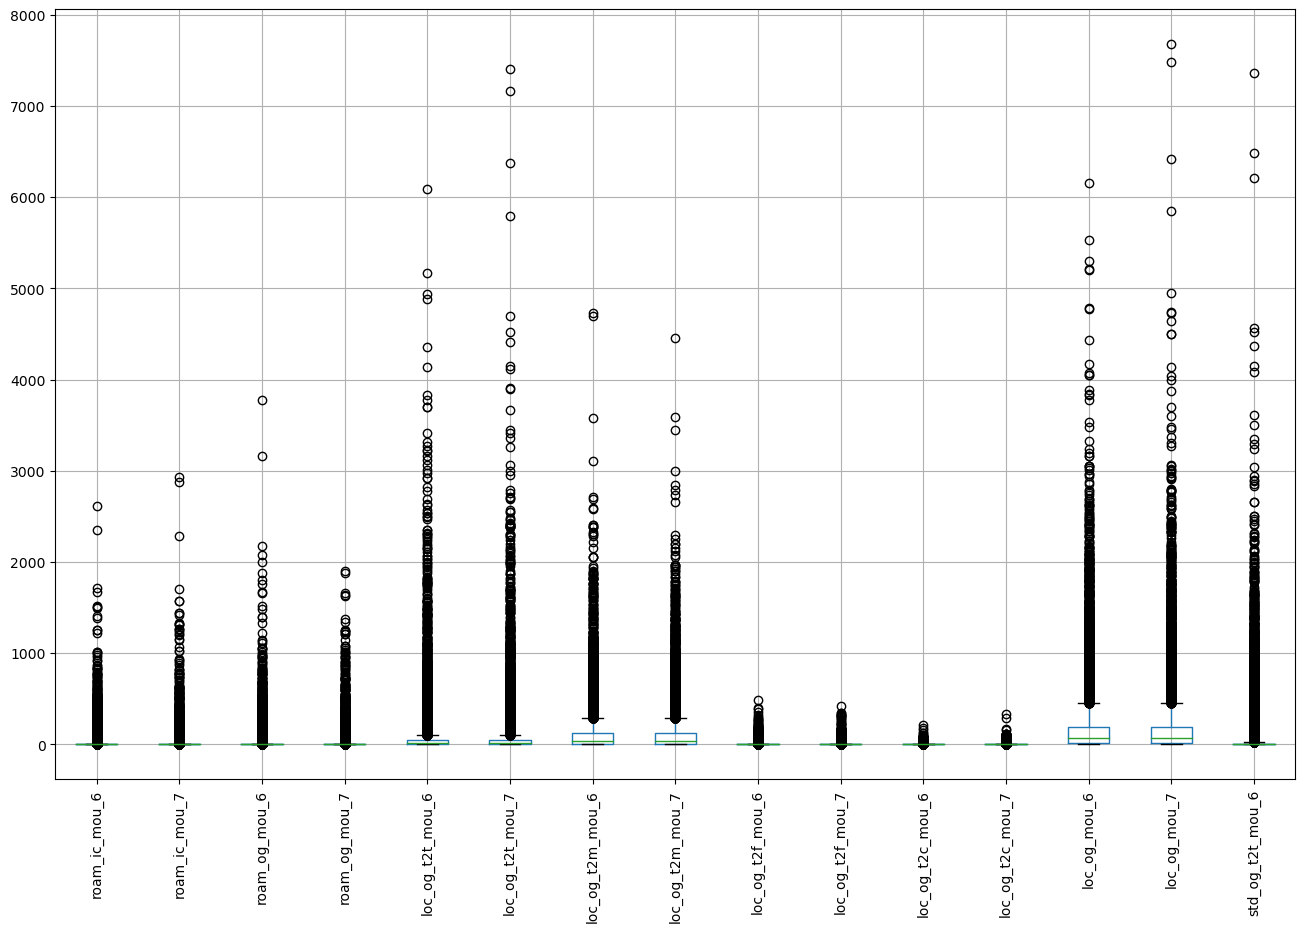

In [64]:
plt.figure(figsize = (16,10)) 
Telecom_df.iloc[:,:15].boxplot()
plt.xticks(rotation=90)
plt.show()

<Figure size 1600x1000 with 0 Axes>

<Axes: >

(array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
         14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
         27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
         40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
         53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
         66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
         79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
         92,  93,  94,  95,  96,  97,  98,  99, 100]),
 [Text(1, 0, 'roam_ic_mou_6'),
  Text(2, 0, 'roam_ic_mou_7'),
  Text(3, 0, 'roam_og_mou_6'),
  Text(4, 0, 'roam_og_mou_7'),
  Text(5, 0, 'loc_og_t2t_mou_6'),
  Text(6, 0, 'loc_og_t2t_mou_7'),
  Text(7, 0, 'loc_og_t2m_mou_6'),
  Text(8, 0, 'loc_og_t2m_mou_7'),
  Text(9, 0, 'loc_og_t2f_mou_6'),
  Text(10, 0, 'loc_og_t2f_mou_7'),
  Text(11, 0, 'loc_og_t2c_mou_6'),
  Text(12, 0, 'loc_og_t2c_mou_7'),
  Text(13, 0, 'loc_og_mou_6'),
  Te

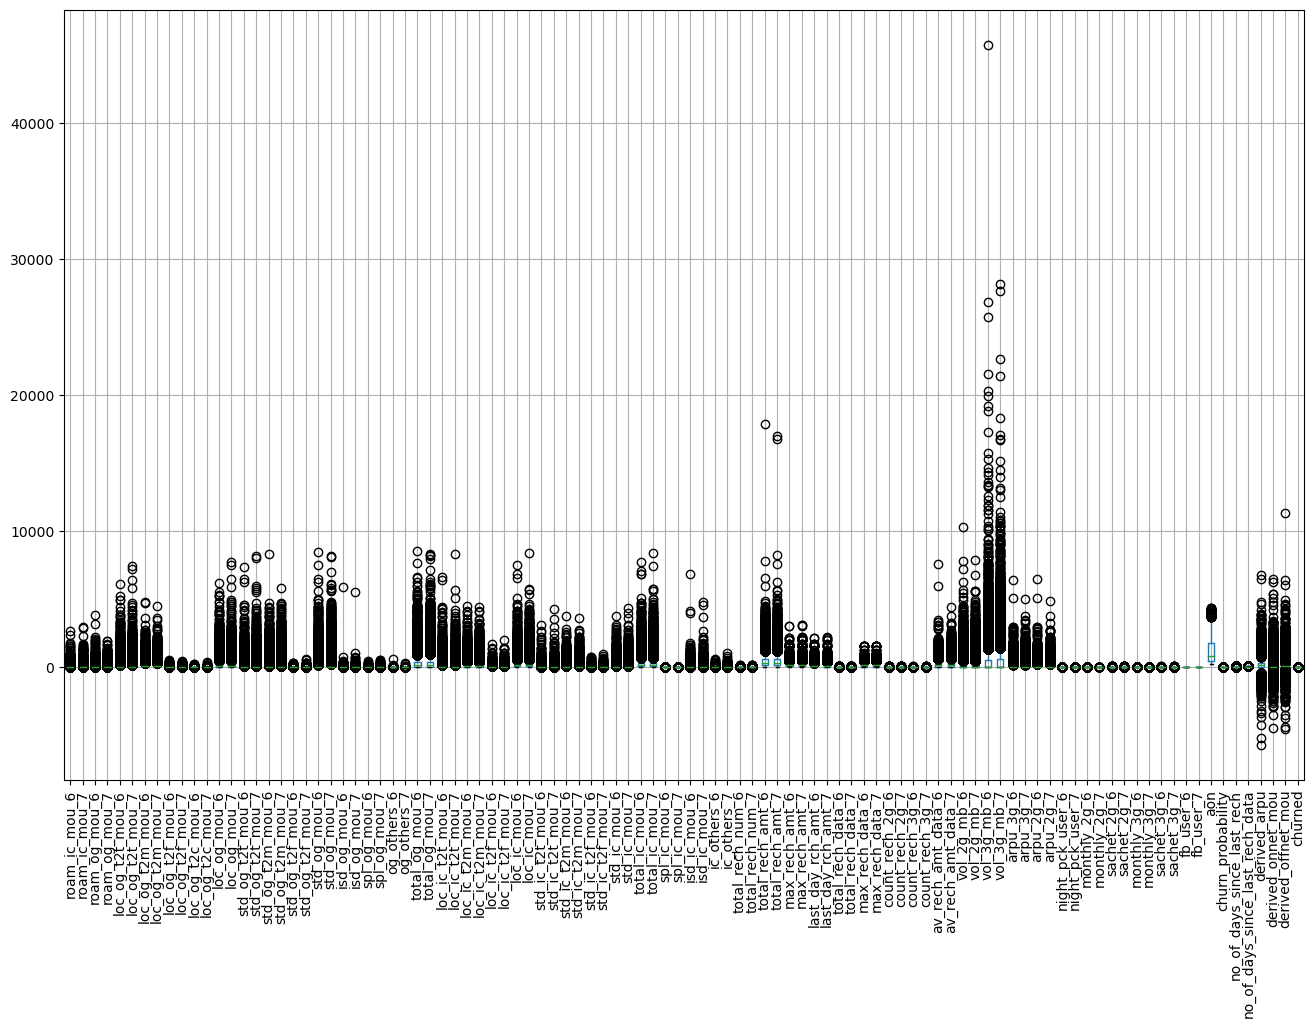

In [65]:
plt.figure(figsize=(16, 10))
Telecom_df.boxplot()
plt.xticks(rotation=90)
plt.show()

Most of the features have high number of outliers, dropping the outliers will cause loss of information. Hence capping and flooring the extreme values.

In [66]:
# Convert columns to numeric
telecom_numeric = telecom.drop(['churn_probability'], axis=1).apply(pd.to_numeric, errors='coerce')

# Capping outliers
for x in telecom_numeric.columns:
    Q1 = telecom_numeric[x].quantile(0.25)
    Q3 = telecom_numeric[x].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    telecom_numeric[x] = telecom_numeric[x].clip(lower=lower_bound, upper=upper_bound)

# Display the shape before and after capping outliers
print("Shape before capping outliers:", telecom.shape)
print("Shape after capping outliers:", telecom_numeric.shape)


Shape before capping outliers: (99999, 172)
Shape after capping outliers: (99999, 171)


## Check Correlation

In [67]:
first_half = Telecom_df.columns[:23]
first_half = first_half.append(Telecom_df.columns[-2:-1]) # including 'churned column'
first_half

Index(['roam_ic_mou_6', 'roam_ic_mou_7', 'roam_og_mou_6', 'roam_og_mou_7',
       'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2m_mou_6',
       'loc_og_t2m_mou_7', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7',
       'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_mou_6', 'loc_og_mou_7',
       'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2m_mou_6',
       'std_og_t2m_mou_7', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7',
       'std_og_mou_6', 'std_og_mou_7', 'isd_og_mou_6', 'derived_offnet_mou'],
      dtype='object')

<Figure size 2000x1600 with 0 Axes>

<Axes: >

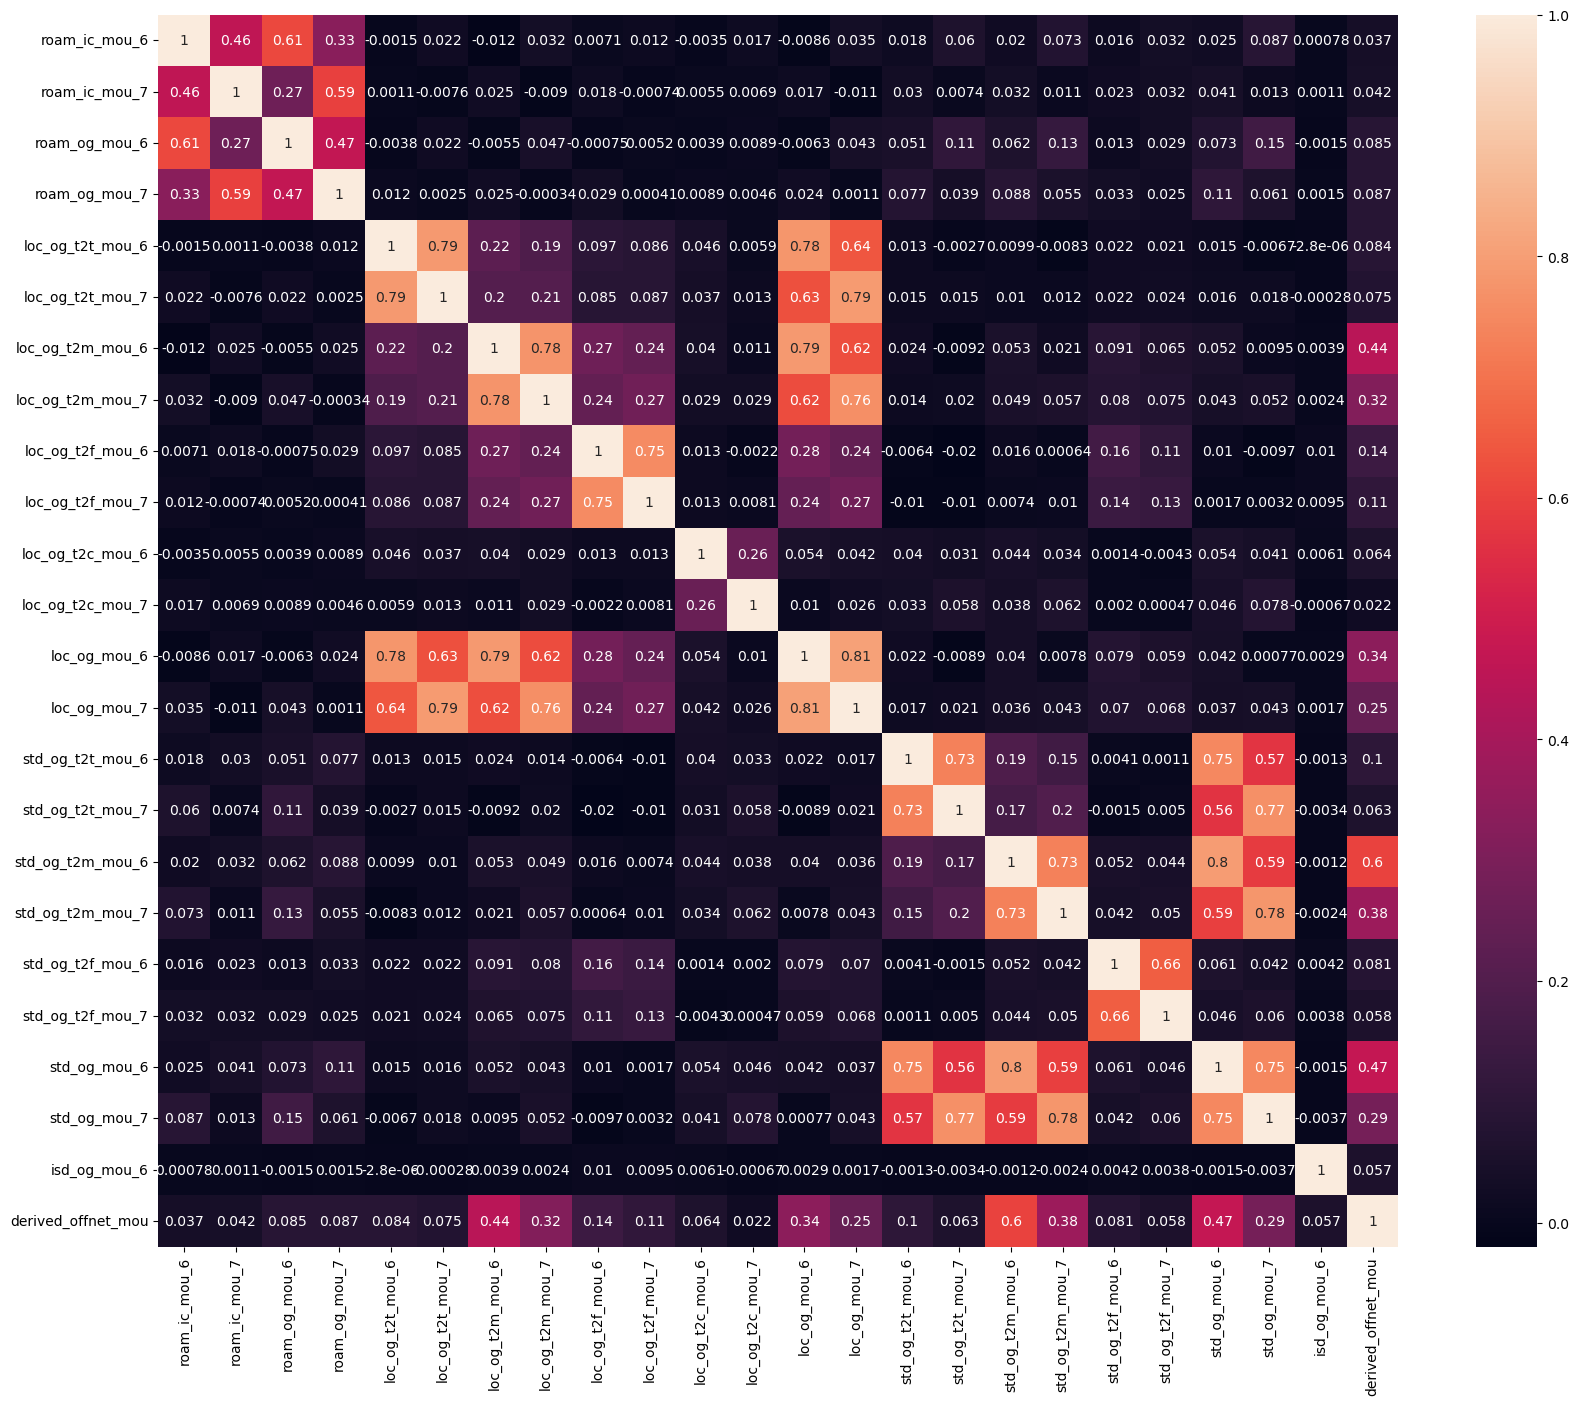

In [68]:
plt.figure(figsize=(20,16))
sns.heatmap(Telecom_df[first_half].corr(), annot=True)
plt.show()

<Figure size 1600x1000 with 0 Axes>

<Axes: >

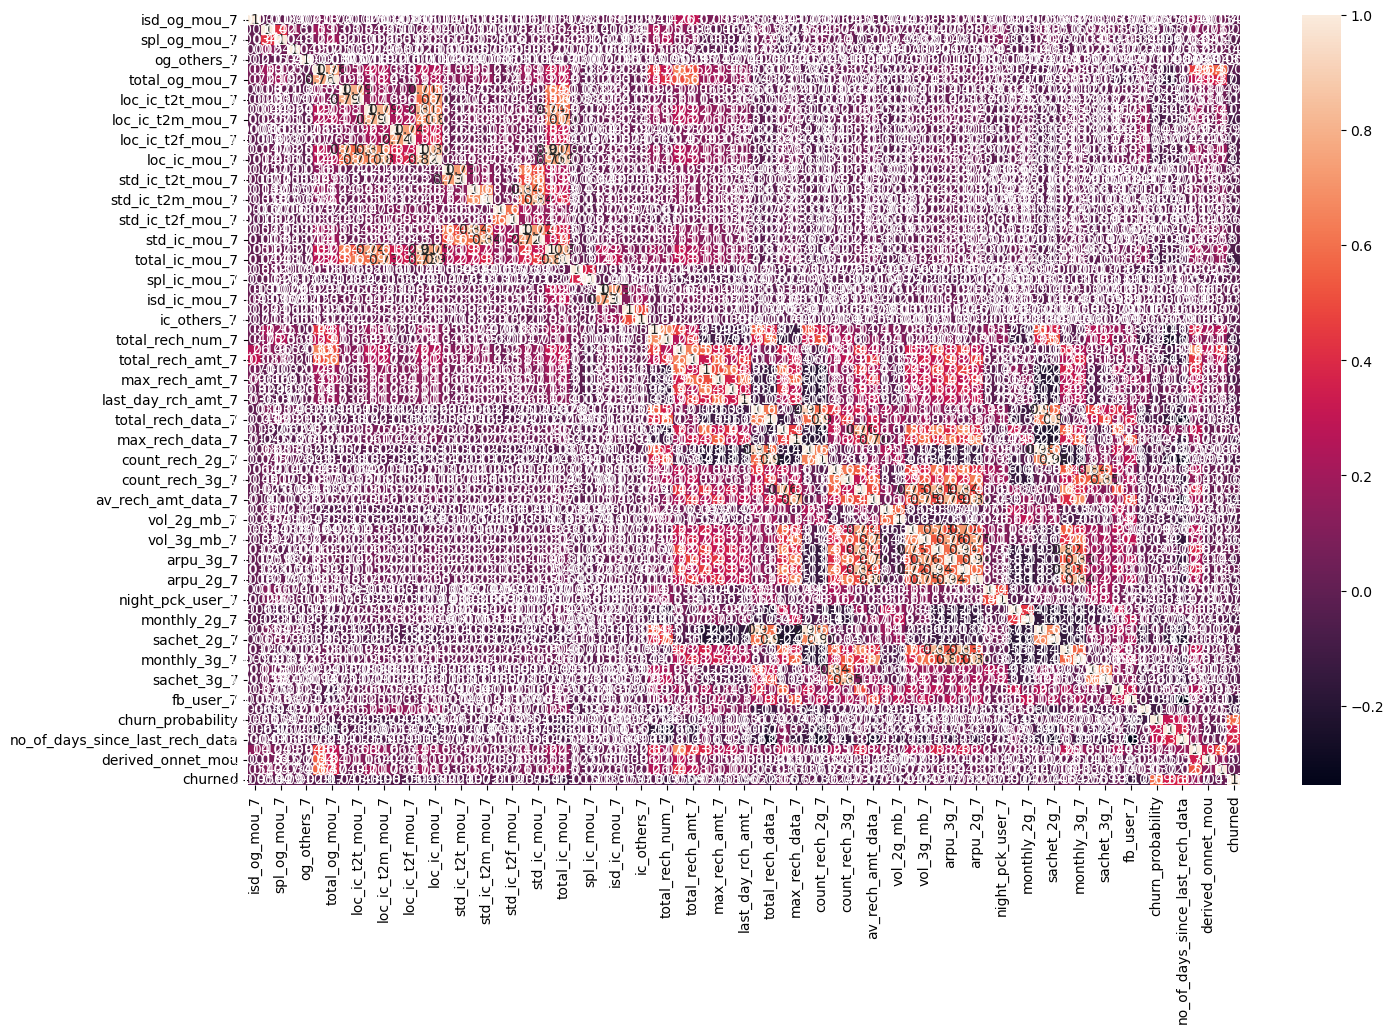

In [69]:
plt.figure(figsize = (16,10))
sns.heatmap(Telecom_df.iloc[:,23:].corr(),annot = True)
plt.show()

In [70]:
# After Outlier Treatment some features have no variance
# Identifying features having fixed values in all rows and columns and removing them

skewed = []
for x in Telecom_df.columns:
    if len(Telecom_df[x].value_counts())==1:
        skewed.append(x)
        print(Telecom_df[x].value_counts())
print(skewed)

[]


There are no features having fixed values in all rows and columns and removing them

### Bivariate and Multivariate Analysis

#### 1. Analysis  total_rech_amt_6'vs total_rech_num_6 

<Axes: title={'center': 'Non_Churned'}, xlabel='total_rech_amt_6', ylabel='total_rech_num_6'>

<Axes: title={'center': 'Churned'}, xlabel='total_rech_amt_6', ylabel='total_rech_num_6'>

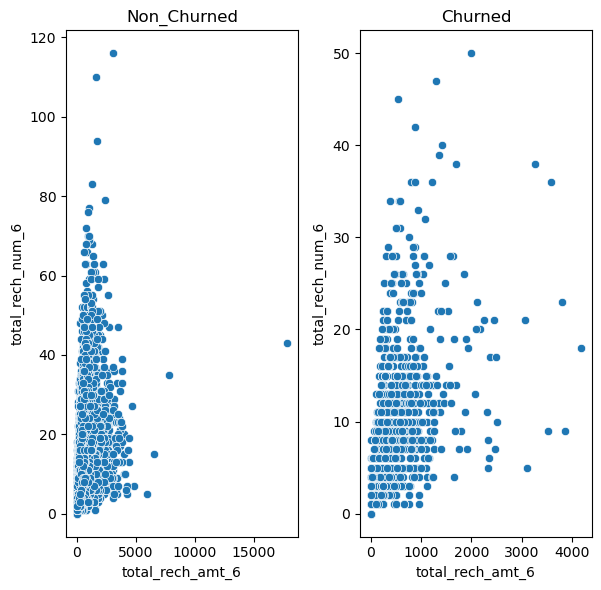

In [71]:
# Churned (Yes = 1 and No = 0)

fig = plt.figure(figsize=(12, 6))


ax1 = fig.add_subplot(1, 4, 1, title="Non_Churned")
ax2 = fig.add_subplot(1, 4, 2, title="Churned")

sns.scatterplot(x='total_rech_amt_6', y='total_rech_num_6', data=Telecom_df[Telecom_df['churned'] == 0], ax=ax1)
sns.scatterplot(x='total_rech_amt_6', y='total_rech_num_6', data=Telecom_df[Telecom_df['churned'] == 1], ax=ax2)

plt.tight_layout()
plt.show()

#### 2. Analysis total_rech_amt_7' vs y='total_rech_num_7

<Axes: title={'center': 'Non_Churned'}, xlabel='total_rech_amt_7', ylabel='total_rech_num_7'>

<Axes: title={'center': 'Churned'}, xlabel='total_rech_amt_7', ylabel='total_rech_num_7'>

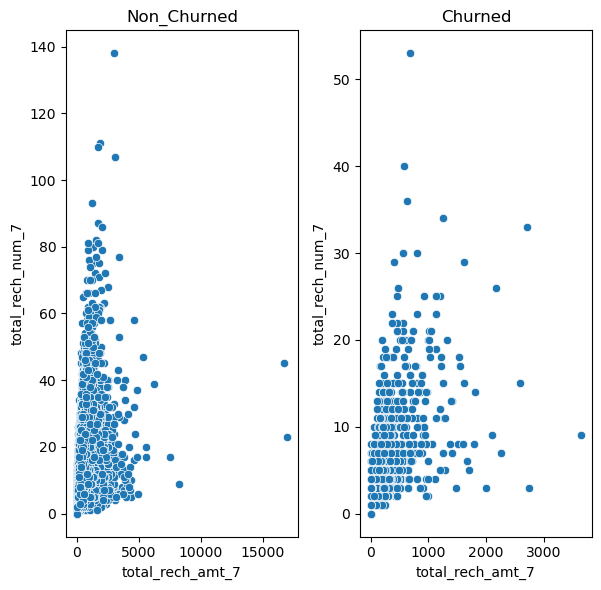

In [72]:
# Churned (Yes = 1 and No = 0)

fig = plt.figure(figsize=(12, 6))


ax1 = fig.add_subplot(1, 4, 1, title="Non_Churned")
ax2 = fig.add_subplot(1, 4, 2, title="Churned")

sns.scatterplot(x='total_rech_amt_7', y='total_rech_num_7', data=Telecom_df[Telecom_df['churned'] == 0], ax=ax1)
sns.scatterplot(x='total_rech_amt_7', y='total_rech_num_7', data=Telecom_df[Telecom_df['churned'] == 1], ax=ax2)

plt.tight_layout()
plt.show()

#### 3. Let Analysis Churn vs churn_probability between total_rech_amt_6', y='total_rech_num_6'

<Axes: title={'center': 'Non_Churned'}, xlabel='total_rech_amt_6', ylabel='total_rech_num_6'>

<Axes: title={'center': 'Churned'}, xlabel='total_rech_amt_6', ylabel='total_rech_num_6'>

<Axes: title={'center': 'Prob_Churned'}, xlabel='total_rech_amt_6', ylabel='total_rech_num_6'>

<Axes: title={'center': 'Prob_Non_Churned'}, xlabel='total_rech_amt_6', ylabel='total_rech_num_6'>

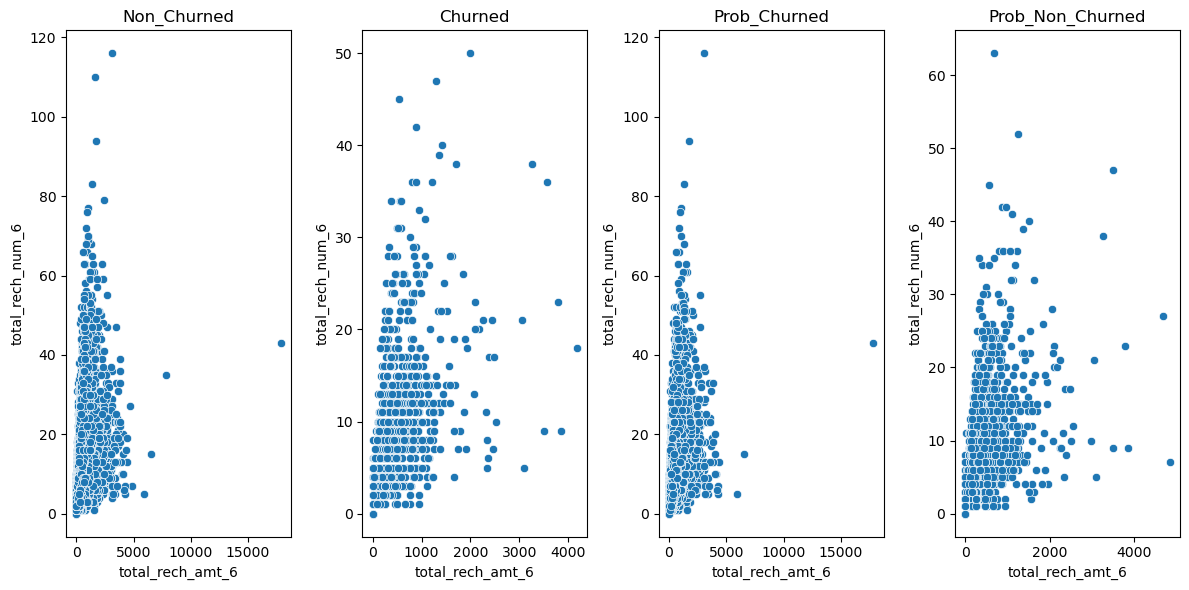

In [73]:


fig = plt.figure(figsize=(12, 6))

ax1 = fig.add_subplot(1, 4, 1, title="Non_Churned")
ax2 = fig.add_subplot(1, 4, 2, title="Churned")
ax3 = fig.add_subplot(1, 4, 3, title="Prob_Churned")
ax4 = fig.add_subplot(1, 4, 4, title="Prob_Non_Churned")

sns.scatterplot(x='total_rech_amt_6', y='total_rech_num_6', data=Telecom_df[Telecom_df['churned'] == 0], ax=ax1)
sns.scatterplot(x='total_rech_amt_6', y='total_rech_num_6', data=Telecom_df[Telecom_df['churned'] == 1], ax=ax2)
sns.scatterplot(x='total_rech_amt_6', y='total_rech_num_6', data=Telecom_df[Telecom_df['churn_probability'] == 0], ax=ax3)
sns.scatterplot(x='total_rech_amt_6', y='total_rech_num_6', data=Telecom_df[Telecom_df['churn_probability'] == 1], ax=ax4)

plt.tight_layout()
plt.show()

#### 4. Let Analysis Churn vs churn_probability total_rech_amt_7', y='total_rech_num_7'


<Axes: title={'center': 'Non_Churned'}, xlabel='total_rech_amt_7', ylabel='total_rech_num_7'>

<Axes: title={'center': 'Churned'}, xlabel='total_rech_amt_7', ylabel='total_rech_num_7'>

<Axes: title={'center': 'Prob_Churned'}, xlabel='total_rech_amt_7', ylabel='total_rech_num_7'>

<Axes: title={'center': 'Prob_Non_Churned'}, xlabel='total_rech_amt_7', ylabel='total_rech_num_7'>

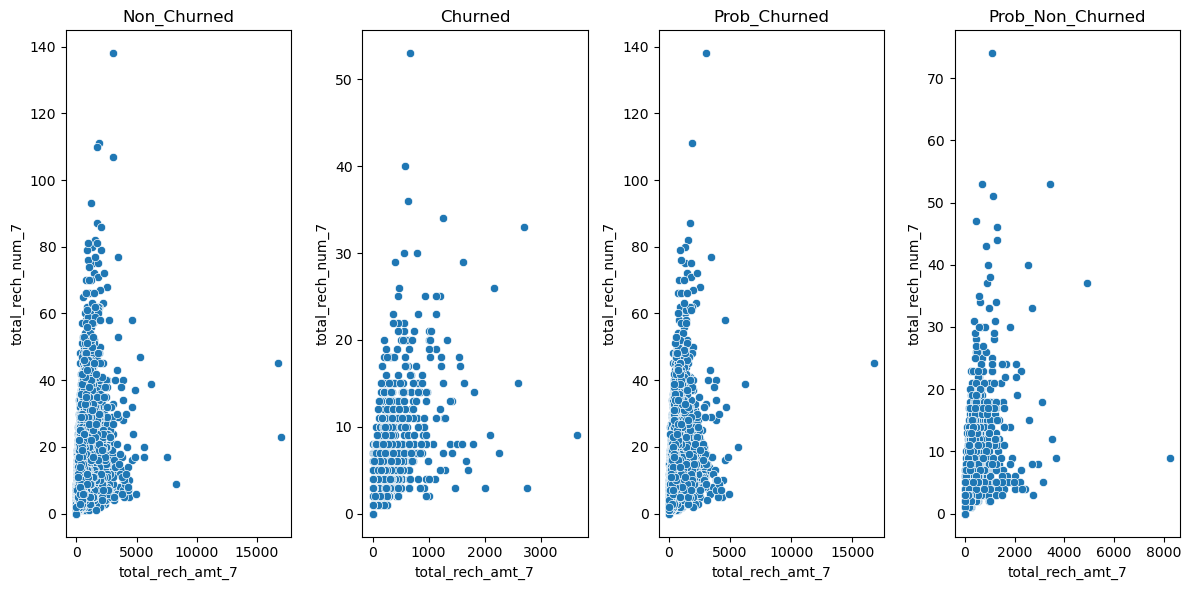

In [74]:

fig = plt.figure(figsize=(12, 6))

ax1 = fig.add_subplot(1, 4, 1, title="Non_Churned")
ax2 = fig.add_subplot(1, 4, 2, title="Churned")
ax3 = fig.add_subplot(1, 4, 3, title="Prob_Churned")
ax4 = fig.add_subplot(1, 4, 4, title="Prob_Non_Churned")

sns.scatterplot(x='total_rech_amt_7', y='total_rech_num_7', data=Telecom_df[Telecom_df['churned'] == 0], ax=ax1)
sns.scatterplot(x='total_rech_amt_7', y='total_rech_num_7', data=Telecom_df[Telecom_df['churned'] == 1], ax=ax2)
sns.scatterplot(x='total_rech_amt_7', y='total_rech_num_7', data=Telecom_df[Telecom_df['churn_probability'] == 0], ax=ax3)
sns.scatterplot(x='total_rech_amt_7', y='total_rech_num_7', data=Telecom_df[Telecom_df['churn_probability'] == 1], ax=ax4)

plt.tight_layout()
plt.show()

#### 5. Anlysis last_day_rch_amt_6', y='max_rech_amt_6 with Churn

<Axes: title={'center': 'Non_Churned'}, xlabel='last_day_rch_amt_6', ylabel='max_rech_amt_6'>

<Axes: title={'center': 'Churned'}, xlabel='last_day_rch_amt_6', ylabel='max_rech_amt_6'>

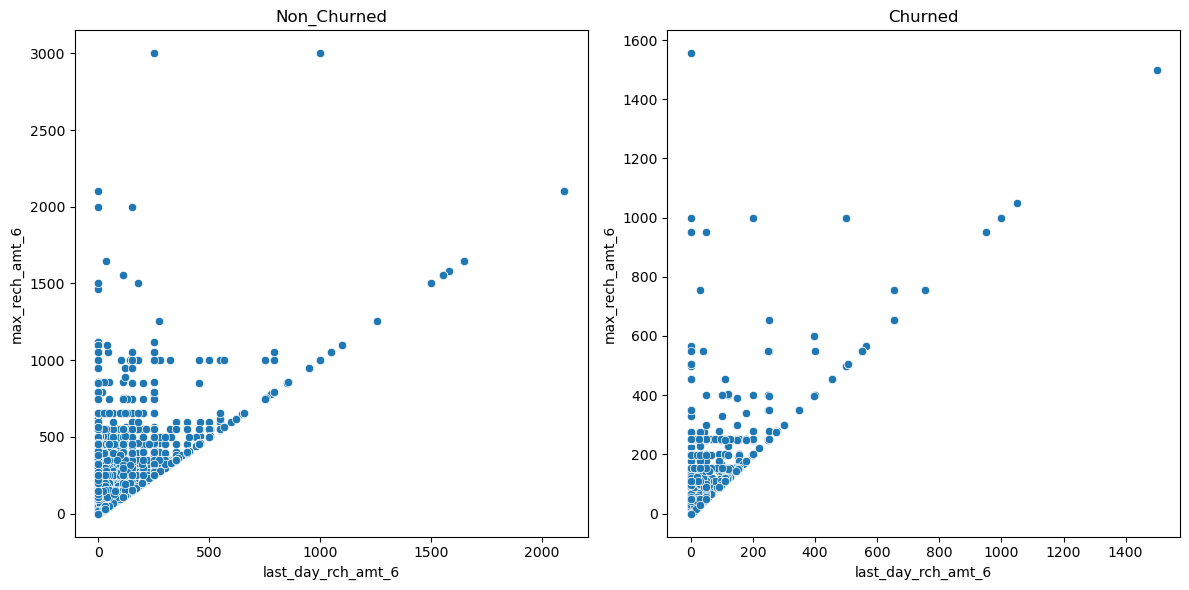

In [75]:
# Churn 

fig = plt.figure(figsize=(12, 6))

ax1 = fig.add_subplot(1, 2, 1, title="Non_Churned")
ax2 = fig.add_subplot(1, 2, 2, title="Churned")

sns.scatterplot(x='last_day_rch_amt_6', y='max_rech_amt_6', data=Telecom_df[Telecom_df['churned'] == 0], ax=ax1)
sns.scatterplot(x='last_day_rch_amt_6', y='max_rech_amt_6', data=Telecom_df[Telecom_df['churned'] == 1], ax=ax2)

plt.tight_layout()
plt.show()




#### 6. Anlaysis between last_day_rch_amt_7', max_rech_amt_7' with churned

<Axes: title={'center': 'Non_Churned'}, xlabel='last_day_rch_amt_7', ylabel='max_rech_amt_7'>

<Axes: title={'center': 'Churned'}, xlabel='last_day_rch_amt_7', ylabel='max_rech_amt_7'>

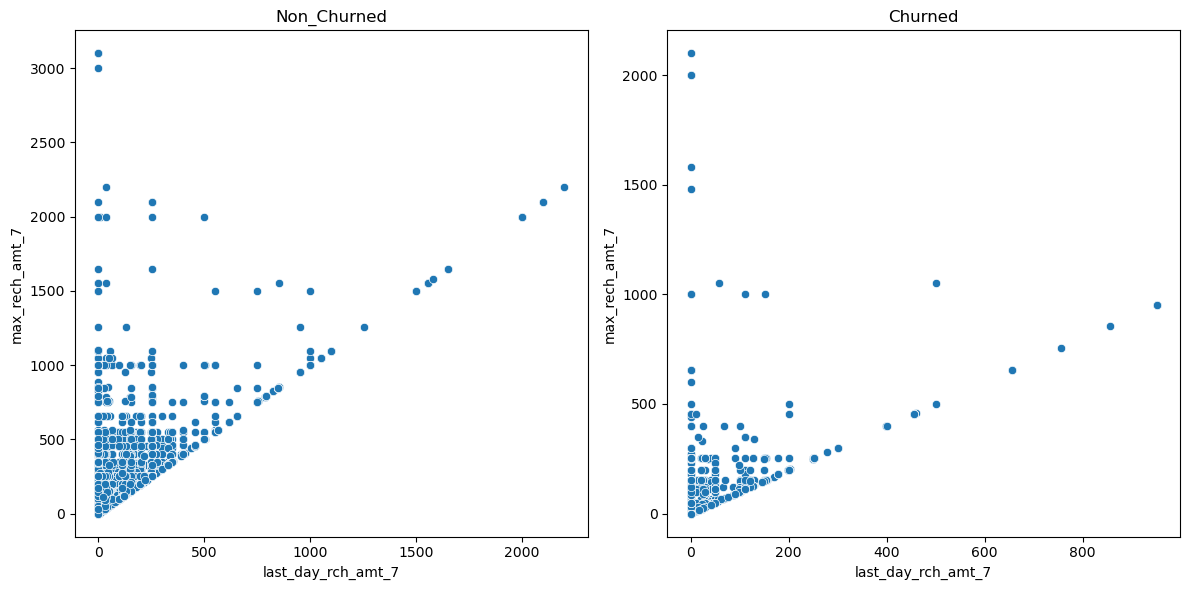

In [76]:
# Churn 

fig = plt.figure(figsize=(12, 6))

ax1 = fig.add_subplot(1, 2, 1, title="Non_Churned")
ax2 = fig.add_subplot(1, 2, 2, title="Churned")

sns.scatterplot(x='last_day_rch_amt_7', y='max_rech_amt_7', data=Telecom_df[Telecom_df['churned'] == 0], ax=ax1)
sns.scatterplot(x='last_day_rch_amt_7', y='max_rech_amt_7', data=Telecom_df[Telecom_df['churned'] == 1], ax=ax2)

plt.tight_layout()
plt.show()


#### 7. Anlysis last_day_rch_amt_7', max_rech_amt_7 with churn_probability and churned

<Axes: title={'center': 'Non_Churned'}, xlabel='last_day_rch_amt_6', ylabel='max_rech_amt_6'>

<Axes: title={'center': 'Churned'}, xlabel='last_day_rch_amt_6', ylabel='max_rech_amt_6'>

<Axes: title={'center': 'Prob_Churned'}, xlabel='last_day_rch_amt_6', ylabel='max_rech_amt_6'>

<Axes: title={'center': 'Prob_Non_Churned'}, xlabel='last_day_rch_amt_6', ylabel='max_rech_amt_6'>

<Axes: title={'center': 'Non_Churned'}, xlabel='last_day_rch_amt_7', ylabel='max_rech_amt_7'>

<Axes: title={'center': 'Churned'}, xlabel='last_day_rch_amt_7', ylabel='max_rech_amt_7'>

<Axes: title={'center': 'Prob_Churned'}, xlabel='last_day_rch_amt_7', ylabel='max_rech_amt_7'>

<Axes: title={'center': 'Prob_Non_Churned'}, xlabel='last_day_rch_amt_7', ylabel='max_rech_amt_7'>

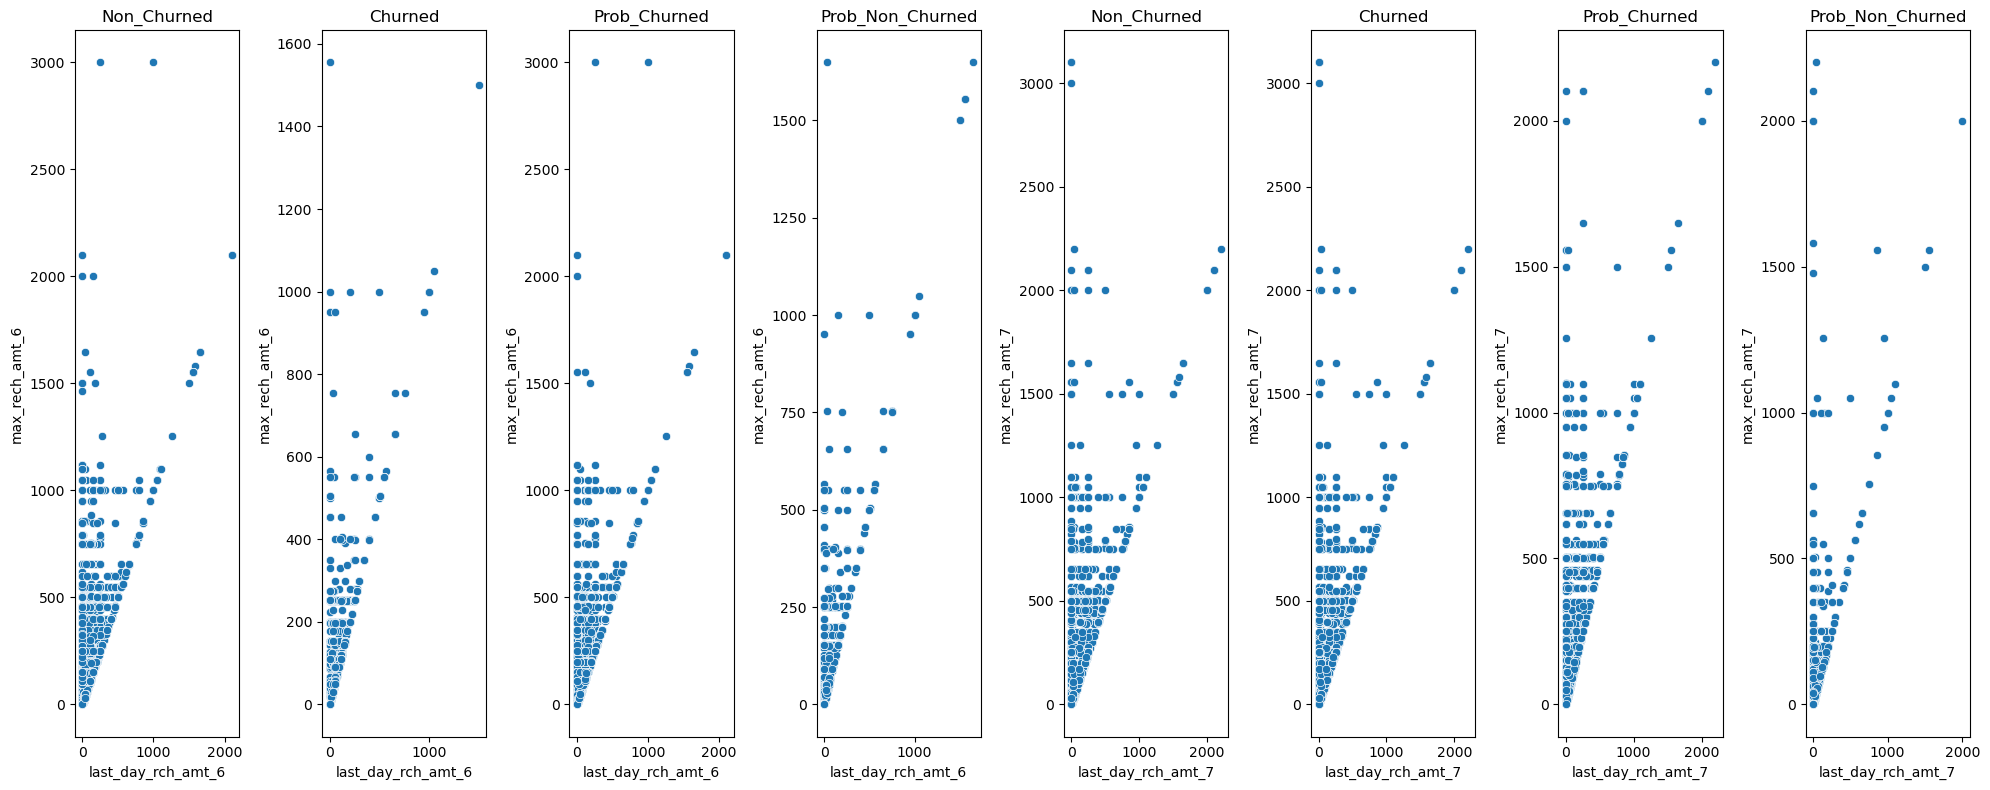

In [77]:
# Let Analysis Churn vs churn_probability 6_Month

fig = plt.figure(figsize=(20,8))

ax1 = fig.add_subplot(1, 8, 1, title="Non_Churned")
ax2 = fig.add_subplot(1, 8, 2, title="Churned")
ax3 = fig.add_subplot(1, 8, 3, title="Prob_Churned")
ax4 = fig.add_subplot(1, 8, 4, title="Prob_Non_Churned")
ax5 = fig.add_subplot(1, 8, 5, title="Non_Churned")
ax6 = fig.add_subplot(1, 8, 6, title="Churned")
ax7 = fig.add_subplot(1, 8, 7, title="Prob_Churned")
ax8 = fig.add_subplot(1, 8, 8, title="Prob_Non_Churned")

sns.scatterplot(x='last_day_rch_amt_6', y='max_rech_amt_6', data=Telecom_df[Telecom_df['churned'] == 0], ax=ax1)
sns.scatterplot(x='last_day_rch_amt_6', y='max_rech_amt_6', data=Telecom_df[Telecom_df['churned'] == 1], ax=ax2)
sns.scatterplot(x='last_day_rch_amt_6', y='max_rech_amt_6', data=Telecom_df[Telecom_df['churn_probability'] == 0], ax=ax3)
sns.scatterplot(x='last_day_rch_amt_6', y='max_rech_amt_6', data=Telecom_df[Telecom_df['churn_probability'] == 1], ax=ax4)
sns.scatterplot(x='last_day_rch_amt_7', y='max_rech_amt_7', data=Telecom_df[Telecom_df['churned'] == 0], ax=ax5)
sns.scatterplot(x='last_day_rch_amt_7', y='max_rech_amt_7', data=Telecom_df[Telecom_df['churned'] == 0], ax=ax6)
sns.scatterplot(x='last_day_rch_amt_7', y='max_rech_amt_7', data=Telecom_df[Telecom_df['churn_probability'] == 0], ax=ax7)
sns.scatterplot(x='last_day_rch_amt_7', y='max_rech_amt_7', data=Telecom_df[Telecom_df['churn_probability'] == 1], ax=ax8)

plt.tight_layout()
plt.show()

#### Analysis no_of_days_since_last_rech vs no_of_days_since_last_rech_data with churned and churn_probability

<Axes: title={'center': 'Non_Churned'}, xlabel='no_of_days_since_last_rech', ylabel='no_of_days_since_last_rech_data'>

<Axes: title={'center': 'Churned'}, xlabel='no_of_days_since_last_rech', ylabel='no_of_days_since_last_rech_data'>

<Axes: title={'center': 'Prob_Churned'}, xlabel='no_of_days_since_last_rech', ylabel='no_of_days_since_last_rech_data'>

<Axes: title={'center': 'Prob_Non_Churned'}, xlabel='no_of_days_since_last_rech', ylabel='no_of_days_since_last_rech_data'>

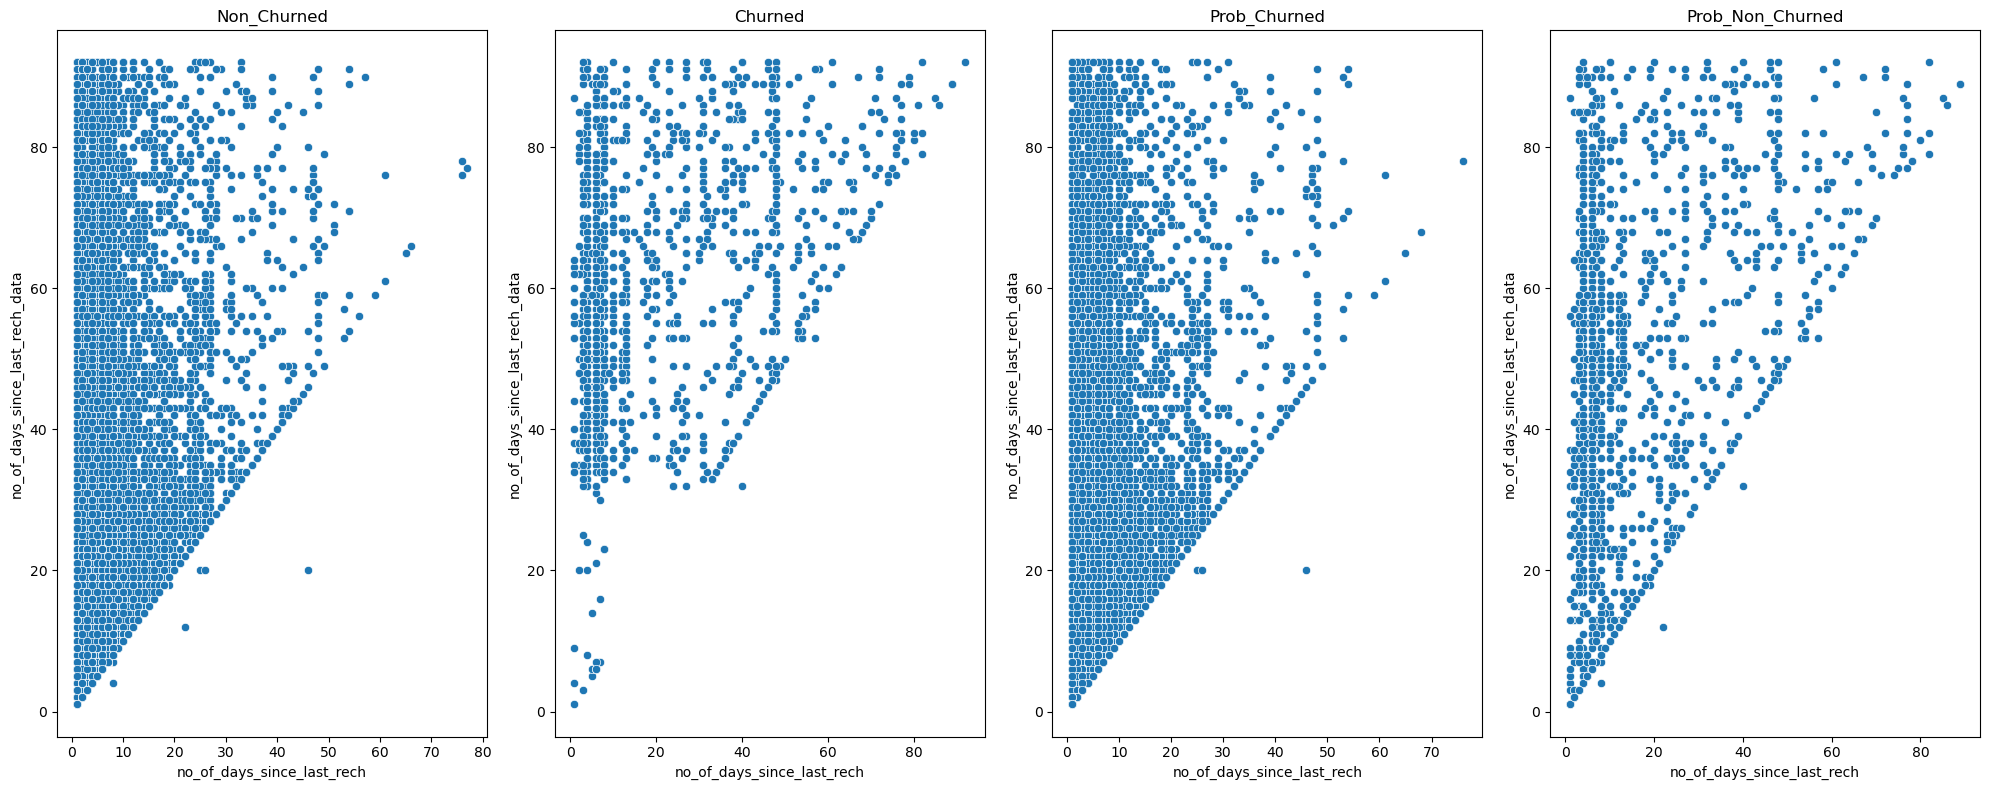

In [78]:

fig = plt.figure(figsize=(20,8))

ax1 = fig.add_subplot(1, 4, 1, title="Non_Churned")
ax2 = fig.add_subplot(1, 4, 2, title="Churned")
ax3 = fig.add_subplot(1, 4, 3, title="Prob_Churned")
ax4 = fig.add_subplot(1, 4, 4, title="Prob_Non_Churned")


sns.scatterplot(x='no_of_days_since_last_rech', y='no_of_days_since_last_rech_data', data=Telecom_df[Telecom_df['churned'] == 0], ax=ax1)
sns.scatterplot(x='no_of_days_since_last_rech', y='no_of_days_since_last_rech_data', data=Telecom_df[Telecom_df['churned'] == 1], ax=ax2)
sns.scatterplot(x='no_of_days_since_last_rech', y='no_of_days_since_last_rech_data', data=Telecom_df[Telecom_df['churn_probability'] == 0], ax=ax3)
sns.scatterplot(x='no_of_days_since_last_rech', y='no_of_days_since_last_rech_data', data=Telecom_df[Telecom_df['churn_probability'] == 1], ax=ax4)

plt.tight_layout()
plt.show()


<Axes: >

<Axes: xlabel='std_og_t2m_mou_6', ylabel='std_og_t2m_mou_7'>

(array([-1000.,     0.,  1000.,  2000.,  3000.,  4000.,  5000.]),
 [Text(-1000.0, 0, '−1000'),
  Text(0.0, 0, '0'),
  Text(1000.0, 0, '1000'),
  Text(2000.0, 0, '2000'),
  Text(3000.0, 0, '3000'),
  Text(4000.0, 0, '4000'),
  Text(5000.0, 0, '5000')])

<Axes: >

<Axes: xlabel='loc_ic_t2m_mou_6', ylabel='loc_ic_t2m_mou_7'>

(array([-1000.,     0.,  1000.,  2000.,  3000.,  4000.,  5000.]),
 [Text(-1000.0, 0, '−1000'),
  Text(0.0, 0, '0'),
  Text(1000.0, 0, '1000'),
  Text(2000.0, 0, '2000'),
  Text(3000.0, 0, '3000'),
  Text(4000.0, 0, '4000'),
  Text(5000.0, 0, '5000')])

<Axes: >

<Axes: xlabel='av_rech_amt_data_6', ylabel='av_rech_amt_data_7'>

(array([-1000.,     0.,  1000.,  2000.,  3000.,  4000.,  5000.,  6000.,
         7000.,  8000.]),
 [Text(-1000.0, 0, '−1000'),
  Text(0.0, 0, '0'),
  Text(1000.0, 0, '1000'),
  Text(2000.0, 0, '2000'),
  Text(3000.0, 0, '3000'),
  Text(4000.0, 0, '4000'),
  Text(5000.0, 0, '5000'),
  Text(6000.0, 0, '6000'),
  Text(7000.0, 0, '7000'),
  Text(8000.0, 0, '8000')])

<Axes: >

<Axes: xlabel='std_og_t2m_mou_6', ylabel='std_og_t2m_mou_7'>

(array([-2000.,     0.,  2000.,  4000.,  6000.,  8000., 10000.]),
 [Text(-2000.0, 0, '−2000'),
  Text(0.0, 0, '0'),
  Text(2000.0, 0, '2000'),
  Text(4000.0, 0, '4000'),
  Text(6000.0, 0, '6000'),
  Text(8000.0, 0, '8000'),
  Text(10000.0, 0, '10000')])

<Axes: >

<Axes: xlabel='loc_ic_t2m_mou_6', ylabel='loc_ic_t2m_mou_7'>

(array([-500.,    0.,  500., 1000., 1500., 2000., 2500., 3000., 3500.]),
 [Text(-500.0, 0, '−500'),
  Text(0.0, 0, '0'),
  Text(500.0, 0, '500'),
  Text(1000.0, 0, '1000'),
  Text(1500.0, 0, '1500'),
  Text(2000.0, 0, '2000'),
  Text(2500.0, 0, '2500'),
  Text(3000.0, 0, '3000'),
  Text(3500.0, 0, '3500')])

<Axes: >

<Axes: xlabel='av_rech_amt_data_6', ylabel='av_rech_amt_data_7'>

(array([-500.,    0.,  500., 1000., 1500., 2000., 2500., 3000., 3500.]),
 [Text(-500.0, 0, '−500'),
  Text(0.0, 0, '0'),
  Text(500.0, 0, '500'),
  Text(1000.0, 0, '1000'),
  Text(1500.0, 0, '1500'),
  Text(2000.0, 0, '2000'),
  Text(2500.0, 0, '2500'),
  Text(3000.0, 0, '3000'),
  Text(3500.0, 0, '3500')])

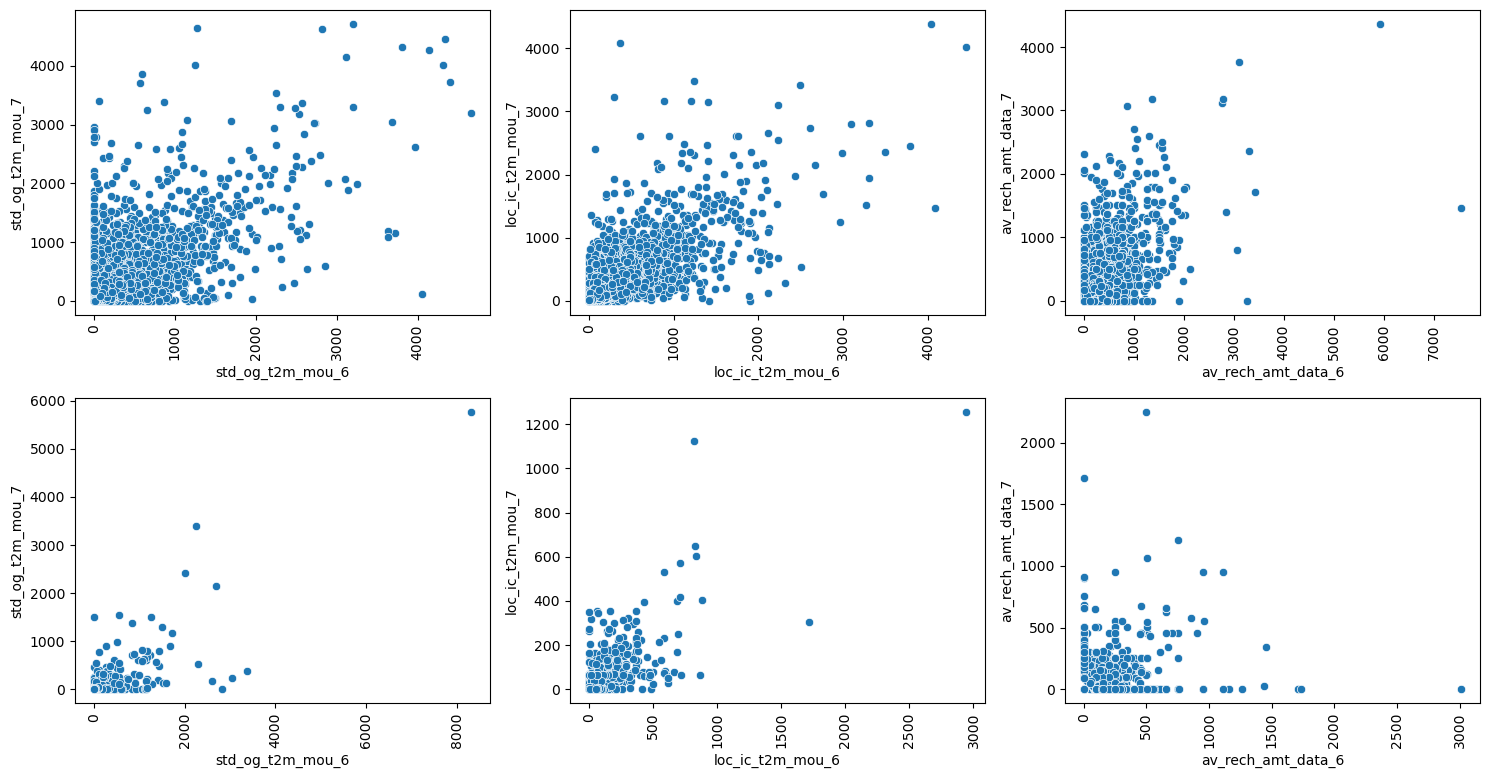

In [79]:
# Checking for correlation between minute of usage of std and local calls for customers and comparing between churned and non-churned customers
# Checking if there is any visible trend in recharge amount for the churned customers.

feature_pair = [['std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_ic_t2t_mou_6', 'std_ic_t2t_mou_7'],
                ['loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7'],
                ['av_rech_amt_data_6', 'av_rech_amt_data_7', 'vol_3g_mb_6', 'vol_3g_mb_7']]

fig = plt.figure(figsize=(15, 15))

for i, feat in enumerate(feature_pair + feature_pair):
    if i < 3:
        churned = 0
    else:
        churned = 1
    plt.subplot(4, 3, i + 1)
    plt.subplots_adjust(hspace=1.0)
    sns.scatterplot(x=Telecom_df[Telecom_df["churned"] == churned][feat[0]],
                    y=Telecom_df[Telecom_df["churned"] == churned][feat[1]])
    plt.xticks(rotation=90)
    plt.tight_layout()

plt.show()


## Data Imbalance Treatment

In [80]:
Telecom_df['churn_probability'] = Telecom_df['churn_probability'].fillna(0).astype(int)

<Figure size 800x600 with 0 Axes>

<Axes: xlabel='churned,churn_probability'>

Text(0.5, 1.0, 'Class Distribution')

Text(0.5, 0, 'Class Labels')

Text(0, 0.5, 'Count')

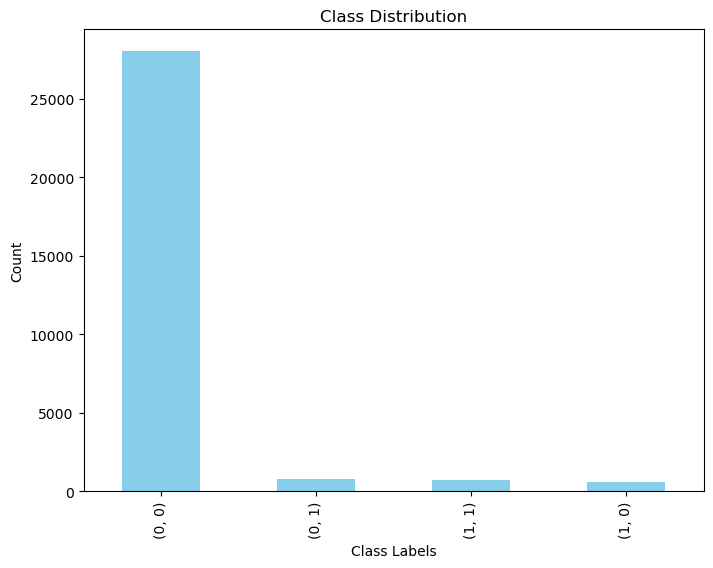

The dataset is imbalanced.
Imbalance Ratio: 0.02


In [81]:
# Calculate class distribution
class_distribution = Telecom_df[['churned','churn_probability']].value_counts()

# Plot the class distribution
plt.figure(figsize=(8, 6))
class_distribution.plot(kind='bar', color='skyblue')
plt.title('Class Distribution')
plt.xlabel('Class Labels')
plt.ylabel('Count')
plt.show()

# Check for imbalance
imbalance_threshold = 0.05  # You can adjust this threshold based on your problem
imbalance_ratio = class_distribution.min() / class_distribution.max()

if imbalance_ratio < 1 - imbalance_threshold:
    print("The dataset is imbalanced.")
    print(f"Imbalance Ratio: {imbalance_ratio:.2f}")
else:
    print("The dataset is balanced.")
    print(f"Imbalance Ratio: {imbalance_ratio:.2f}")

## Splitting Data into Training and Test set

In [82]:


# Separate features and target variable
X = Telecom_df.drop(columns=['churned','churn_probability'])
y = Telecom_df[['churned','churn_probability']]


In [83]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Separate features and target variable
X = Telecom_df.drop(columns=['churned', 'churn_probability'])
y = Telecom_df['churned']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=42)

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Now you can use X_resampled and y_resampled in your machine learning model training
print("Before Data Imbalance Treatment: ")
print("X train scaled shape : ", X_train.shape)
print("y train shape : ", y_train.shape)

print("After Data Imbalance Treatment: ")
print("X train shape : ", X_resampled.shape)
print("y train shape : ", y_resampled.shape)

Before Data Imbalance Treatment: 
X train scaled shape :  (21120, 98)
y train shape :  (21120,)
After Data Imbalance Treatment: 
X train shape :  (40364, 98)
y train shape :  (40364,)


- For building predictor model (where predicting churn is more important than model interpreatability), dimensionality reduction technique PCA will be applied on Independent variables.
- For identifying most significant driving factors of churn, X_train_scaled will be used. 

## Applying PCA and Building Predictor Model

In [84]:
def evaluate_model(y_true, y_pred):
    confusion = metrics.confusion_matrix(y_true, y_pred)
    TP = confusion[1,1] 
    TN = confusion[0,0] 
    FP = confusion[0,1] 
    FN = confusion[1,0] 

    accuracy_sc = metrics.accuracy_score(y_true, y_pred)
    sensitivity_score = TP / float(TP+FN)
    return accuracy_sc, sensitivity_score

## Logistic Regression

Using Logistic Regression Model as the base model. 

- Performing PCA for component numbers 10,15,20,25,30
- Peforming Logistic Regression with different number features and different number of cutoffs 0.2,0.3,0.4,0.5,0.6,0.7,0.8
- Storing the acuracy score and sensitivity scores of the models on test data in 2 different dataframes.
- This will help in finding out optimim number of features (for PCA) and cut off value (for Logistic Regression)

In [85]:
accuracy_test_data = pd.DataFrame(data=np.zeros((7,5)),index=[0.2,0.3,0.4,0.5,0.6,0.7,0.8], columns=[10,15,20,25,30])
sensitivity_test_data = pd.DataFrame(data=np.zeros((7,5)),index=[0.2,0.3,0.4,0.5,0.6,0.7,0.8], columns=[10,15,20,25,30])

In [86]:
for n in [10,15,20,25,30]:
    pca = IncrementalPCA(n_components=n)    
    X_train_pca = pca.fit_transform(X_resampled) # training data is scaled and treated for data imbalance
    X_test_pca = pca.transform(X_test)      # test data is only scaled
      
    X_train_sm = sm.add_constant(X_train_pca)
    X_test_sm = sm.add_constant(X_test_pca)
    logm2 = sm.GLM(y_resampled,X_train_sm, family = sm.families.Binomial())
    res = logm2.fit()

    #y_train_pred = res.predict(X_train_sm)
    y_test_pred = res.predict(X_test_sm)

    df = pd.DataFrame()
    df['true_value'] = y_test.values.reshape(-1)
    df['pred_prob_value'] = y_test_pred.reshape(-1) # predicted probability of churned

    for cutoff in [float(x)/10 for x in range(2, 9)]:
        col_name = 'pred_value' + str(cutoff)
        df[col_name] = df['pred_prob_value'].map(lambda x: 1 if x > cutoff else 0)
        accuracy_test_data.loc[cutoff, n], sensitivity_test_data.loc[cutoff, n] = evaluate_model(y_test, df[col_name])

In [87]:
df.head()

true_value  pred_prob_value  pred_value0.2  pred_value0.3  pred_value0.4  \
0           0         0.000041              0              0              0   
1           0         0.000635              0              0              0   
2           0         0.001181              0              0              0   
3           0         0.422508              1              1              1   
4           0         0.046077              0              0              0   

   pred_value0.5  pred_value0.6  pred_value0.7  pred_value0.8  
0              0              0              0              0  
1              0              0              0              0  
2              0              0              0              0  
3              0              0              0              0  
4              0              0              0              0

In [88]:
sensitivity_test_data

10        15        20        25        30
0.2  0.926471  0.948529  0.948529  0.958333  0.955882
0.3  0.897059  0.916667  0.924020  0.943627  0.950980
0.4  0.835784  0.889706  0.901961  0.936275  0.943627
0.5  0.757353  0.865196  0.884804  0.916667  0.921569
0.6  0.659314  0.803922  0.848039  0.884804  0.892157
0.7  0.549020  0.686275  0.784314  0.838235  0.840686
0.8  0.404412  0.509804  0.610294  0.718137  0.750000

In [89]:
accuracy_test_data

10        15        20        25        30
0.2  0.500110  0.657203  0.717742  0.768449  0.778833
0.3  0.601525  0.730667  0.781485  0.820813  0.827552
0.4  0.692333  0.790212  0.826005  0.856827  0.864008
0.5  0.779054  0.839262  0.861136  0.884556  0.888643
0.6  0.850641  0.876823  0.890080  0.906430  0.907866
0.7  0.905877  0.908087  0.915267  0.924326  0.927419
0.8  0.934158  0.931175  0.934711  0.942775  0.945868

After inspecting accuracy score and sensitivity score for different number of principal components and cut off , taking 15 components and cutoff=0.5

In [90]:
pca = IncrementalPCA(n_components=15)    
X_train_pca = pca.fit_transform(X_resampled)
X_test_pca = pca.transform(X_test)

In [91]:
evaluation_df = pd.DataFrame(data=np.zeros((4,2)), index=['Logistic Regression', 'Decision Tree', 'Random Forest', 'XGBoost'], columns=['Accuracy', 'Sensitivity'])
evaluation_df.loc['Logistic Regression', 'Accuracy'] = round(accuracy_test_data.loc[0.4, 15], 3)
evaluation_df.loc['Logistic Regression', 'Sensitivity'] = round(sensitivity_test_data.loc[0.4, 15],3)
evaluation_df

Accuracy  Sensitivity
Logistic Regression      0.79         0.89
Decision Tree            0.00         0.00
Random Forest            0.00         0.00
XGBoost                  0.00         0.00

- Since the main objective is to predict as much potential churn as possible, we will be focusing on sensitivity for model evaluation.
- With GridSearchCV finding tuning the hyperparameters and obtaining the best estimator

## Decision Tree

In [92]:
dt = DecisionTreeClassifier(random_state=101)
params = {
    'max_depth': [5, 10, 20],
    'min_samples_leaf': [5, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}
grid_search = GridSearchCV(estimator=dt, 
                           param_grid=params, 
                           cv=3, n_jobs=-1, verbose=1, scoring = "recall")
grid_search.fit(X_train_pca, y_resampled)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=101),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 20],
                         'min_samples_leaf': [5, 20, 50, 100]},
             scoring='recall', verbose=1)

In [93]:
grid_search.best_params_

{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 5}

In [94]:
dt_best = grid_search.best_estimator_
dt_best.fit(X_train_pca, y_resampled)
y_train_pred_dt = dt_best.predict(X_train_pca)
y_test_pred_dt = dt_best.predict(X_test_pca)
print(y_test_pred_dt)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, random_state=101)

[0 0 0 ... 0 0 1]


In [95]:
print("Performance of Decision Tree Classifier on training data")
accuracy_sc, sensitivity_score = evaluate_model(y_resampled, y_train_pred_dt)
print("Accuracy : ", accuracy_sc)
print("Sensitivity : ", sensitivity_score)

print("Performance of Decision Tree Classifier on test data")
accuracy_sc, sensitivity_score = evaluate_model(y_test, y_test_pred_dt)
evaluation_df.loc['Decision Tree', 'Accuracy'] = accuracy_sc
evaluation_df.loc['Decision Tree', 'Sensitivity'] = sensitivity_score
evaluation_df

Performance of Decision Tree Classifier on training data
Accuracy :  0.9218858388663165
Sensitivity :  0.9606580120899811
Performance of Decision Tree Classifier on test data


Accuracy  Sensitivity
Logistic Regression  0.790000     0.890000
Decision Tree        0.848763     0.708333
Random Forest        0.000000     0.000000
XGBoost              0.000000     0.000000

## Random Forest

In [96]:
# Use fewer values for hyperparameters
params = {
    'max_depth': [10, 30],
    'min_samples_leaf': [5, 50],
    'max_features': [3, 5],
    'n_estimators': [50, 100]
}

# Reduce the number of cross-validation folds
cv_folds = 2

# Create the RandomForestClassifier with fewer estimators
classifier_rf = RandomForestClassifier(random_state=101, n_jobs=-1)

grid_search = GridSearchCV(estimator=classifier_rf, param_grid=params, 
                           cv=cv_folds, n_jobs=-1, verbose=1, scoring="recall")

# Use a subset of your data for faster execution (optional)
# X_train_pca_subset = ...
# y_resampled_subset = ...
# grid_search.fit(X_train_pca_subset, y_resampled_subset)

grid_search.fit(X_train_pca, y_resampled)
rf_best = grid_search.best_estimator_


Fitting 2 folds for each of 16 candidates, totalling 32 fits


GridSearchCV(cv=2,
             estimator=RandomForestClassifier(n_jobs=-1, random_state=101),
             n_jobs=-1,
             param_grid={'max_depth': [10, 30], 'max_features': [3, 5],
                         'min_samples_leaf': [5, 50],
                         'n_estimators': [50, 100]},
             scoring='recall', verbose=1)

In [97]:
grid_search.best_params_

{'max_depth': 30,
 'max_features': 5,
 'min_samples_leaf': 5,
 'n_estimators': 100}

In [98]:
rf_best.fit(X_train_pca, y_resampled)
y_train_pred_rf = rf_best.predict(X_train_pca)
y_test_pred_rf = rf_best.predict(X_test_pca)
print(y_test_pred_rf)

RandomForestClassifier(max_depth=30, max_features=5, min_samples_leaf=5,
                       n_jobs=-1, random_state=101)

[0 0 0 ... 0 0 0]


In [99]:
print("Performance of Random Forest Classifier on training data")
accuracy_sc, sensitivity_score = evaluate_model(y_resampled, y_train_pred_rf)
print("Accuracy : ", accuracy_sc)
print("Sensitivity : ", sensitivity_score)

print("Performance of Random Forest Classifier on test data")
accuracy_sc,sensitivity_score = evaluate_model(y_test, y_test_pred_rf)
evaluation_df.loc['Random Forest', 'Accuracy'] = round(accuracy_sc, 5)
evaluation_df.loc['Random Forest', 'Sensitivity'] = round(sensitivity_score, 5)
evaluation_df

Performance of Random Forest Classifier on training data
Accuracy :  0.9900406302645922
Sensitivity :  0.9968784065008424
Performance of Random Forest Classifier on test data


Accuracy  Sensitivity
Logistic Regression  0.790000     0.890000
Decision Tree        0.848763     0.708333
Random Forest        0.931290     0.647060
XGBoost              0.000000     0.000000

## XGBoost

In [100]:
xgclf = xgb.XGBClassifier()

parameters = {'learning_rate': [0.2, 0.3, 0.4],
              'max_depth': [10, 20],
              'n_estimators': [100, 200, 500]}

clf_xgb = GridSearchCV(estimator=xgclf,
                      param_grid=parameters,
                      n_jobs=-1,
                      cv=3,
                      scoring='recall',
                      verbose=1,
                      refit=True)

clf_xgb.fit(X_train_pca, y_train_pred_rf)

Fitting 3 folds for each of 18 candidates, totalling 54 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.2, 0.3, 0.4],
                         'max_depth': [10, 20],
                         'n_estimators': [100, 200, 500]},
             scoring='recall', verbose=1)

In [101]:
clf_xgb.best_params_

{'learning_rate': 0.2, 'max_depth': 10, 'n_estimators': 500}

In [102]:
xgb_best = clf_xgb.best_estimator_

xgb_best.fit(X_train_pca, y_train_pred_rf)
y_train_pred_xgb = xgb_best.predict(X_train_pca)
y_test_pred_xgb = xgb_best.predict(X_test_pca)
print(y_test_pred_xgb)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

[0 0 0 ... 0 0 0]


In [103]:
print("Performance of XGBoost Classifier on training data")
accuracy_sc, sensitivity_score = evaluate_model(y_train_pred_rf, y_train_pred_xgb)
print("Accuracy : ", accuracy_sc)
print("Sensitivity : ", sensitivity_score)

print("Performance of XGBoost Classifier on test data")
accuracy_sc, sensitivity_score = evaluate_model(y_test, y_test_pred_xgb)
evaluation_df.loc['XGBoost', 'Accuracy'] = round(accuracy_sc, 5)
evaluation_df.loc['XGBoost', 'Sensitivity'] = round(sensitivity_score, 5)
evaluation_df

Performance of XGBoost Classifier on training data
Accuracy :  1.0
Sensitivity :  1.0
Performance of XGBoost Classifier on test data


Accuracy  Sensitivity
Logistic Regression  0.790000     0.890000
Decision Tree        0.848763     0.708333
Random Forest        0.931290     0.647060
XGBoost              0.934160     0.622550